In [1]:
pwd

'C:\\Users\\Suraj\\Documents\\Analytics_Project_Repo\\ML Project\\Global Solution IT\\Codes_And_Results\\Codes'

In [2]:
# Change working directory
import os
os.chdir("C:\\Users\\Suraj\\Documents\\Analytics_Project_Repo\\ML Project\\Global Solution IT\\GAIS-TASK\\data")

In [3]:
pwd

'C:\\Users\\Suraj\\Documents\\Analytics_Project_Repo\\ML Project\\Global Solution IT\\GAIS-TASK\\data'

In [4]:
# show list Of dataset in the directory
os.listdir("C:\\Users\\Suraj\\Documents\\Analytics_Project_Repo\\ML Project\\Global Solution IT\\GAIS-TASK\\data")

['overview_of_each_var.html',
 'p_value_less.xlsx',
 'submission.csv',
 'summary_output.xlsx',
 'test_set.csv',
 'training_set.csv']

Importing the Python libraries we will be using for this project

In [5]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
import plotly.graph_objects as go
import re
import missingno as msno
import sweetviz as sv

from imblearn.over_sampling import SMOTE
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler

from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix,roc_curve,roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif
import statsmodels.api as sm

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras.optimizers as optimizers
from tensorflow.keras.callbacks import EarlyStopping

C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 01.Read the CSV Data 

In [6]:
train_data = pd.read_csv("training_set.csv")
test_data = pd.read_csv("test_set.csv")
ss = pd.read_csv("submission.csv")

In [7]:
train_data.shape , test_data.shape , ss.shape

((3910, 59), (691, 58), (691, 2))

In [8]:
train_data.head(n=5)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


In [9]:
test_data.head(n=5)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0,0.70,0.0,0.70,0.0,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.105,0.000,0.000,2.342,47,89
1,1,0.00,0.0,0.84,0.0,0.84,0.00,0.84,0.00,0.00,...,0.0,0.0,0.388,0.0,0.776,0.129,0.000,10.375,168,249
2,2,0.46,0.3,0.46,0.0,0.05,0.12,0.05,0.28,0.43,...,0.0,0.0,0.065,0.0,0.325,0.756,0.153,5.891,193,3040
3,3,0.10,0.2,1.01,0.0,0.80,0.80,0.50,0.00,0.80,...,0.0,0.0,0.110,0.0,0.490,0.158,0.015,8.550,669,1351
4,4,0.00,0.0,0.72,0.0,0.72,0.00,0.72,0.00,0.00,...,0.0,0.0,0.364,0.0,0.729,0.121,0.000,7.781,32,249


In [10]:
# the first column "Unnamed: 0" is the default index column created by pandas when writing a DataFrame to a CSV file
# So I am drop it this col beacuse pandas representing index .

train_data = train_data.drop("Unnamed: 0",axis = 1)
test_data = test_data.drop("Unnamed: 0",axis = 1)


# 02.EDA(Exploratory Data Analysis)
Before going to any kind of modelling , I will always want to have a look at kind of data that we have

* Understanding about Data
* Summarize the dataset (data types , No. of Unique values ,target var distribution etc)
* Visuliaze
* cheack input var relation towards target var
* Number Of Missing Values/null Values

In [11]:
# Shape of training dataset

print(f'The training dataset contains {train_data.shape[0]} records and {train_data.shape[1]} variables including Target variable')

The training dataset contains 3910 records and 58 variables including Target variable


In [12]:
# Shape of test dataset
print(f'The test dataset contains {test_data.shape[0]} records and {test_data.shape[1]} variables, excluding the target variable.')

The test dataset contains 691 records and 57 variables, excluding the target variable.


In [13]:
# cheack initial  three records of training dataset
train_data.head(n=3)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.0,0.00,4.34,0.0,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.000,0.0,1.342,0.0,0.000,1.200,2,12,0
1,0.0,0.56,0.56,0.0,1.12,0.56,2.25,0.0,0.0,0.56,...,0.0,0.083,0.0,0.503,0.0,0.083,16.304,148,375,1
2,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.000,0.0,0.000,0.0,0.000,1.000,1,5,0


In [14]:
# cheack initial three records of test dataset

test_data.head(n=3)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0.70,0.0,0.70,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.105,0.000,0.000,2.342,47,89
1,0.00,0.0,0.84,0.0,0.84,0.00,0.84,0.00,0.00,0.00,...,0.0,0.0,0.388,0.0,0.776,0.129,0.000,10.375,168,249
2,0.46,0.3,0.46,0.0,0.05,0.12,0.05,0.28,0.43,0.74,...,0.0,0.0,0.065,0.0,0.325,0.756,0.153,5.891,193,3040


we don't need the "test data" for now , we will get back to its once we have completed our EDA , preprocessing and model building phase*

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      3910 non-null   float64
 1   X2      3910 non-null   float64
 2   X3      3910 non-null   float64
 3   X4      3910 non-null   float64
 4   X5      3910 non-null   float64
 5   X6      3910 non-null   float64
 6   X7      3910 non-null   float64
 7   X8      3910 non-null   float64
 8   X9      3910 non-null   float64
 9   X10     3910 non-null   float64
 10  X11     3910 non-null   float64
 11  X12     3910 non-null   float64
 12  X13     3910 non-null   float64
 13  X14     3910 non-null   float64
 14  X15     3910 non-null   float64
 15  X16     3910 non-null   float64
 16  X17     3910 non-null   float64
 17  X18     3910 non-null   float64
 18  X19     3910 non-null   float64
 19  X20     3910 non-null   float64
 20  X21     3910 non-null   float64
 21  X22     3910 non-null   float64
 22  

* *The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values)*
* *Looks like we have a only Int & float of data types & there is no missing values in each variable*

### Univariate analysis Overview By Sweetviz ###

*Uncomment the code below and display an overview of each variable*

In [16]:
#overview_of_each_var = sv.analyze(train_data)
#overview_of_each_var.show_html('overview_of_each_var.html')

overview_of_each_var report tells basic understanding i am mension in below point about data
* The data is skewed.
* Each variable contains approximately 90% zero values.
* All variables are numerical

In [17]:
# We can also check for missing values using the isnull() function to cross-verify.

train_data.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
X24    0
X25    0
X26    0
X27    0
X28    0
X29    0
X30    0
X31    0
X32    0
X33    0
X34    0
X35    0
X36    0
X37    0
X38    0
X39    0
X40    0
X41    0
X42    0
X43    0
X44    0
X45    0
X46    0
X47    0
X48    0
X49    0
X50    0
X51    0
X52    0
X53    0
X54    0
X55    0
X56    0
X57    0
Y      0
dtype: int64

 * *No missing values*

In [18]:
# get info for Numric variable

train_data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,...,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,0.102990,0.206419,0.284419,0.062074,0.311309,0.095974,0.112320,0.106041,0.091146,0.244345,...,0.037493,0.139252,0.015876,0.272971,0.077820,0.043828,5.047150,52.338107,283.059079,0.392327
std,0.296322,1.253828,0.504352,1.369361,0.656195,0.261455,0.389516,0.398694,0.271417,0.667065,...,0.235054,0.276309,0.083600,0.858634,0.256991,0.452862,31.397035,204.445218,578.339858,0.488331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000,0.000000
75%,0.000000,0.000000,0.430000,0.000000,0.387500,0.000000,0.000000,0.000000,0.000000,0.170000,...,0.000000,0.188000,0.000000,0.317250,0.054000,0.000000,3.714000,43.000000,264.000000,1.000000
max,4.340000,14.280000,4.540000,42.810000,9.090000,3.570000,7.270000,11.110000,3.230000,18.180000,...,4.385000,9.752000,2.777000,32.478000,6.003000,19.829000,1102.500000,9989.000000,10062.000000,1.000000


Now, we visualize the data using plots for better understanding because the 'describe()' function provides statistics for each variable, making it challenging to summarize effectively

In [19]:
mean_var_df = pd.DataFrame(train_data.mean(),columns=["mean"])

C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Mean Values of Variables')

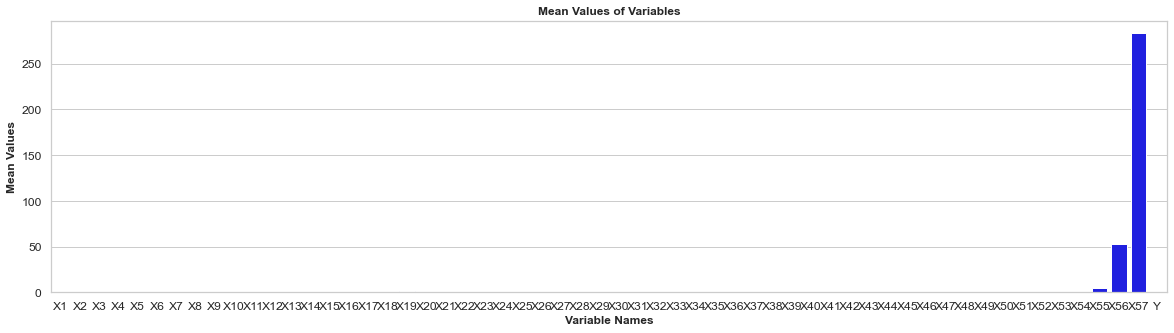

In [20]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [20, 5]})

sns.barplot(mean_var_df.index, mean_var_df["mean"], color='blue')

plt.xlabel('Variable Names',fontweight='bold',fontsize=12)
plt.ylabel('Mean Values',fontweight='bold',fontsize=12)
plt.title('Mean Values of Variables',fontweight='bold',fontsize=12)



* *We can observe from the bar plot that the means of most variables range from 0.006054 to 6.048653. However, two variables, X56 and X57, exhibit extremely high means of 52.338107 and 283.059079, respectively.*

In [21]:
# Cheack duplicate values in data
print(f"Total duplicates in the DataFrame: {train_data.duplicated().sum()}")

Total duplicates in the DataFrame: 296


* *we can observe that there are only a small number of duplicated values in entire DataFrame.*

### Analyzing Numerical Variables ###
* we need to first understand our variables and how variable in this dataset related to our target variable

***Univariate Analysis***

In [22]:
train_data.head(n=5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,0.56,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,0.00,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


In [23]:
train_data["Y"].value_counts() / len(train_data['Y'])

0    0.607673
1    0.392327
Name: Y, dtype: float64

Text(0, 0.5, 'Count')

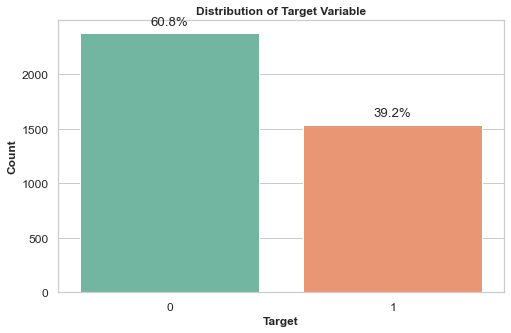

In [24]:
# Plot target variable distribution plot 

sns.set(style="whitegrid",palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

target_distri_plot =sns.countplot(x='Y', data=train_data ,palette='Set2') 

# Apercentages on top of each bar
total = len(train_data['Y'])
for p in target_distri_plot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.02 * total  
    target_distri_plot.annotate(percentage, (x, y), ha='center')

plt.title('Distribution of Target Variable',fontweight='bold',fontsize=12)
plt.xlabel('Target',fontweight='bold',fontsize=12)
plt.ylabel('Count',fontweight='bold',fontsize=12)

* *as we can see that the class labeled as '0' contain 60.8% of the dataset, while the class labeled as '1' contain 39.2%.*
* *So it appears that our dataset is imbalanced.*

In [25]:
train_data.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'Y'],
      dtype='object')

To check whether each variable follows a normal distribution or not.

C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

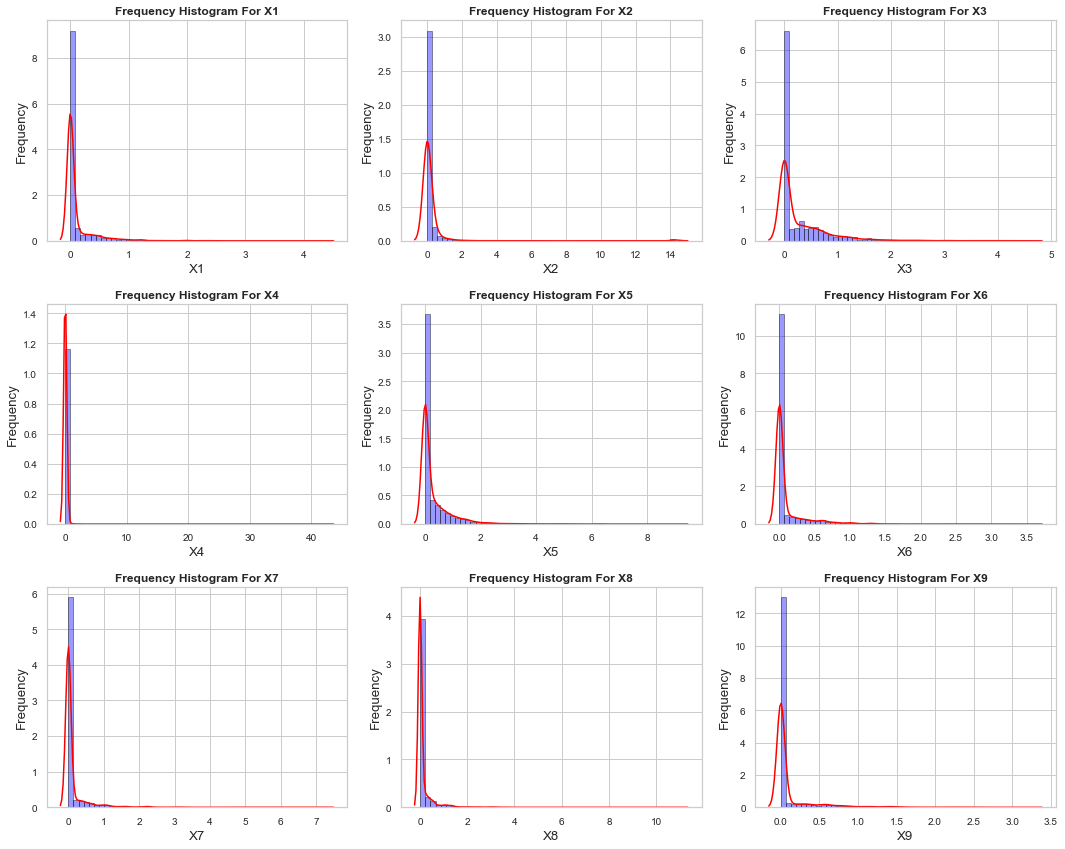

In [26]:
# make variable list for plot histogram

List_of_var = ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9"]


fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

axes = axes.flatten()
# plot distplot for given list of variable
for i, variable in enumerate(List_of_var):
    sns.distplot(train_data[variable], hist=True, bins=50, color='blue',hist_kws={'edgecolor': 'black'}, kde_kws={'color': 'red'}, ax=axes[i])
    
    
    axes[i].set(title=f'Frequency Histogram For {variable}', xlabel=variable, ylabel='Frequency')
    axes[i].tick_params(labelsize=10)
    axes[i].title.set_fontsize(12)
    axes[i].title.set_fontweight('bold')


plt.tight_layout()


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_dtl_hist(df, column_names, percentile_1, percentile_2):
    for column_name in column_names:
        # Calculate statistics
        mean = df[column_name].mean()
        std = df[column_name].std()
        skewness = df[column_name].skew()
        percentiles = df[column_name].quantile([percentile_1, percentile_2])

        # plot histogram
        plt.figure(figsize=(15, 4))
        sns.histplot(df[column_name], kde=True)

        # set vertical dashed lines at specified percentiles
        plt.axvline(x=percentiles[percentile_1], color='r', linestyle='--', label=f'{percentile_1*100}th percentile')
        plt.axvline(x=percentiles[percentile_2], color='g', linestyle='--', label=f'{percentile_2*100}th percentile')

        # customized the plot
        plt.text(0.7, 0.9, f'Mean: {mean:.2f}', transform=plt.gca().transAxes)
        plt.text(0.7, 0.8, f'Standard Deviation: {std:.2f}', transform=plt.gca().transAxes)
        plt.text(0.7, 0.7, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes)

        
        plt.title(f'Distribution of {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')

        
        plt.legend()
        


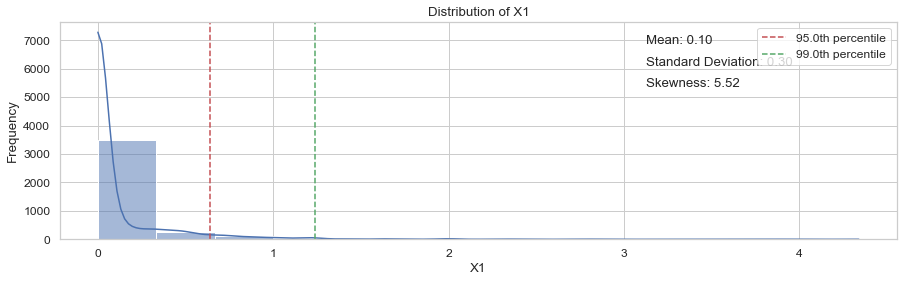

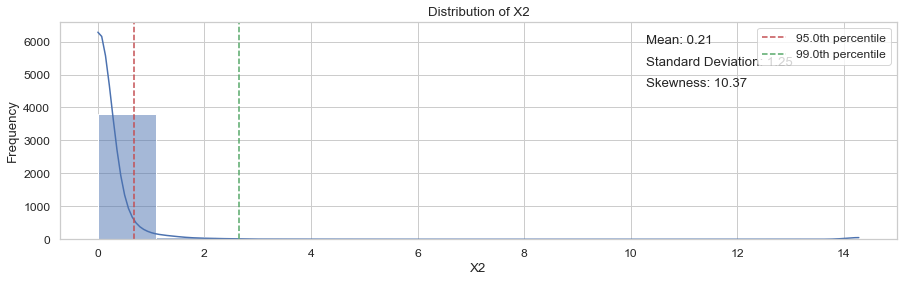

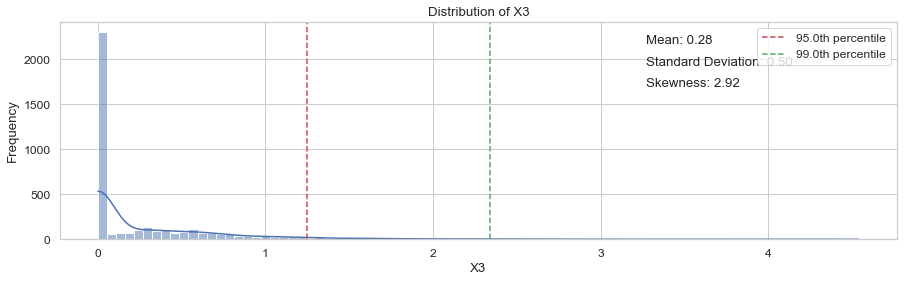

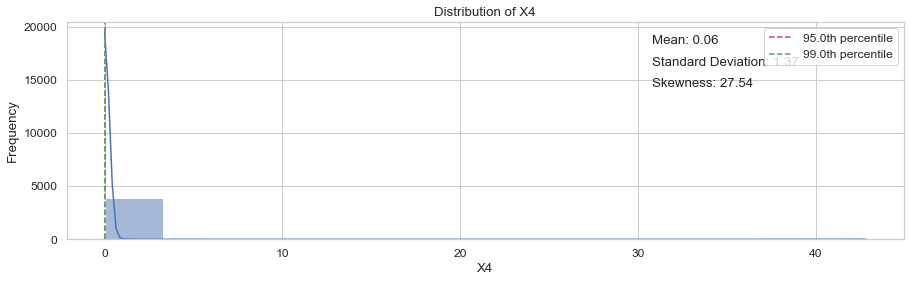

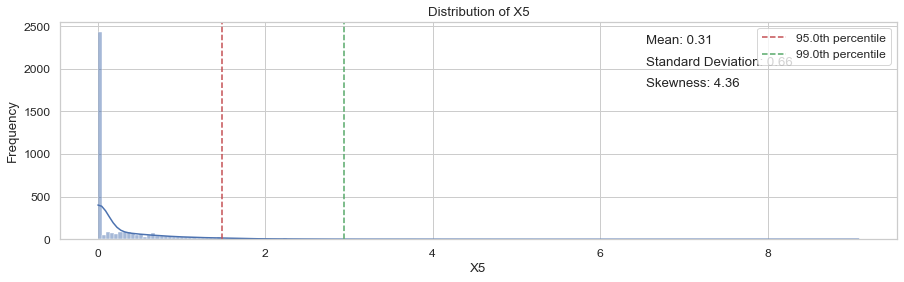

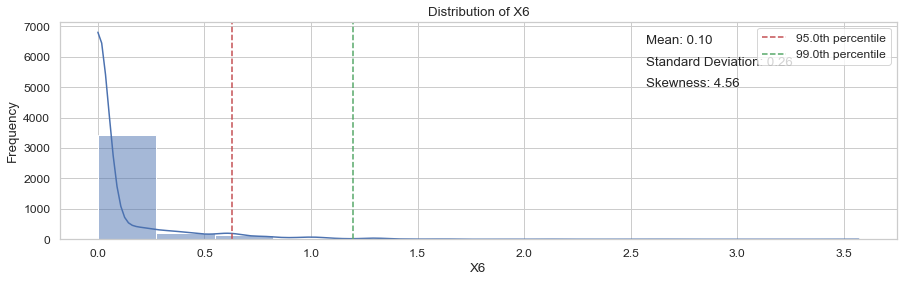

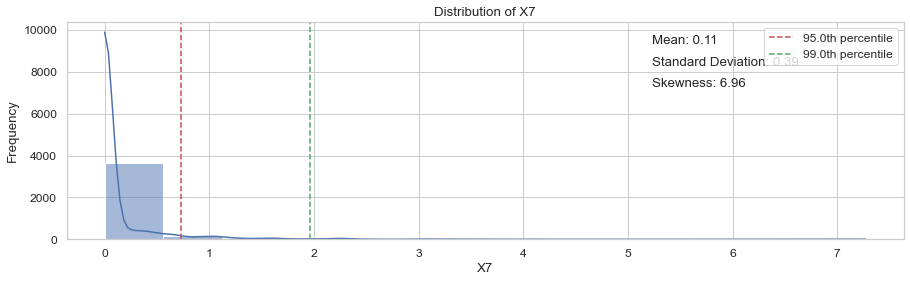

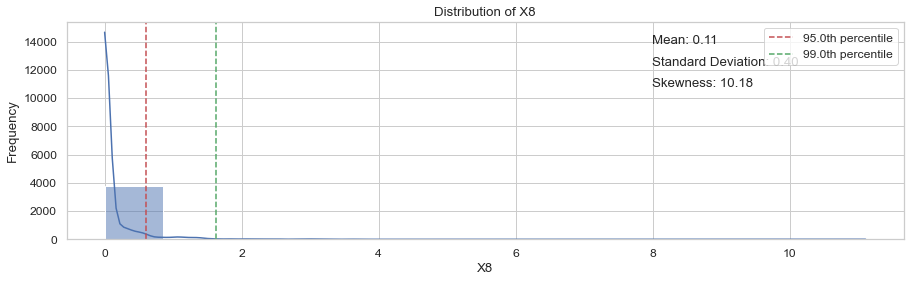

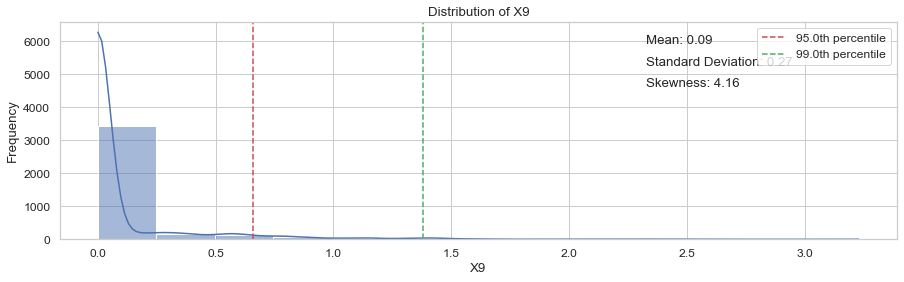

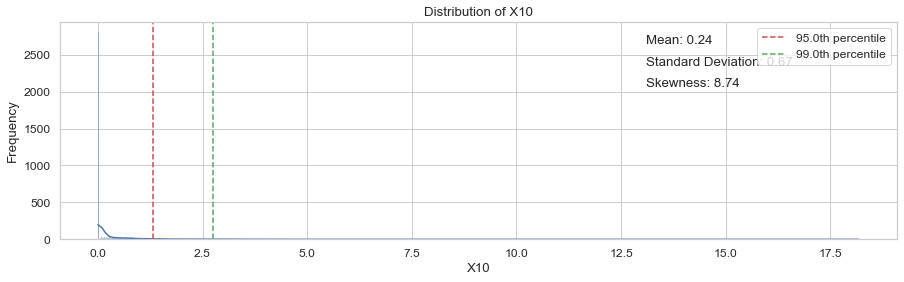

In [28]:
columns_to_plot = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10']
plot_dtl_hist(train_data, columns_to_plot, 0.95, 0.99)

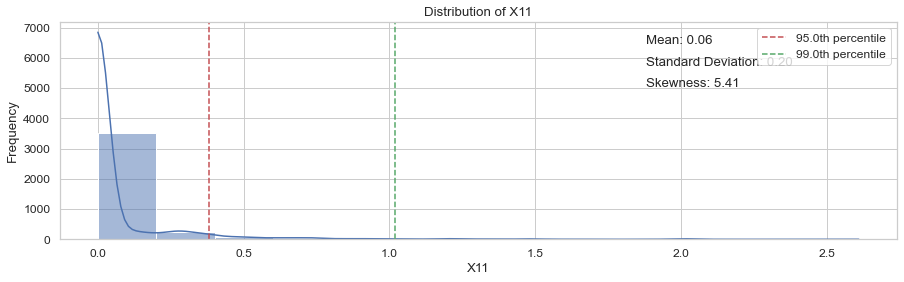

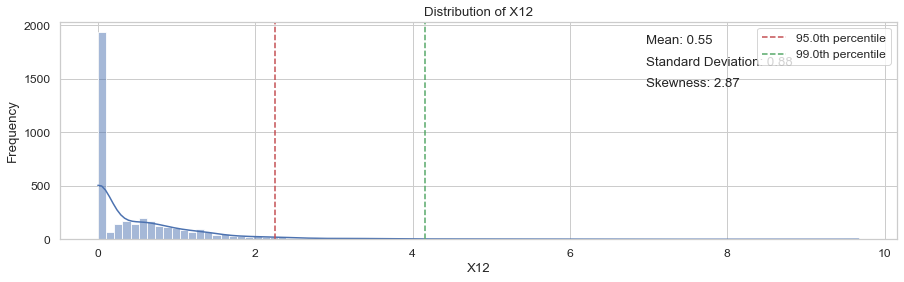

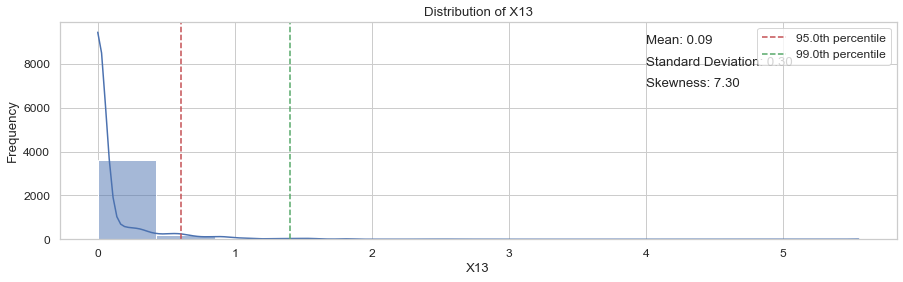

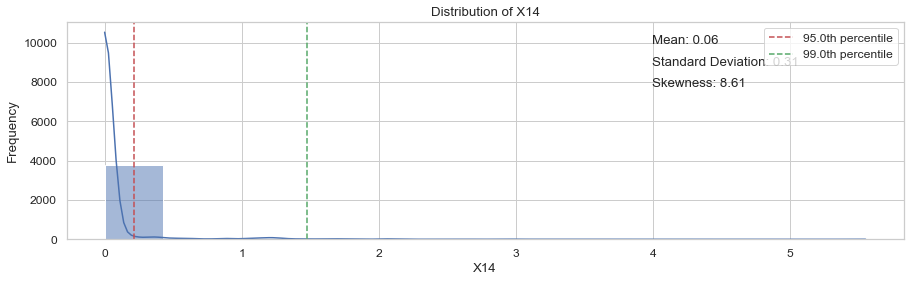

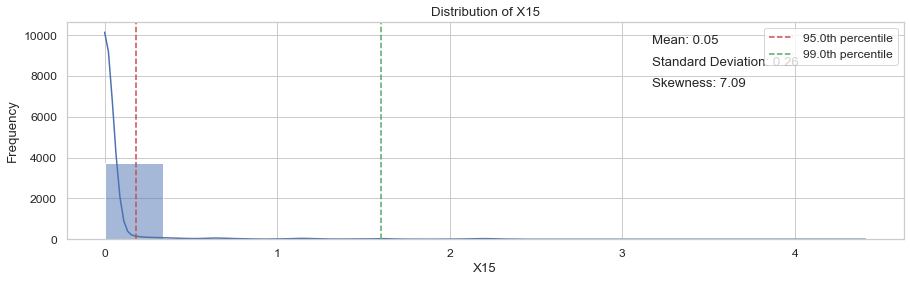

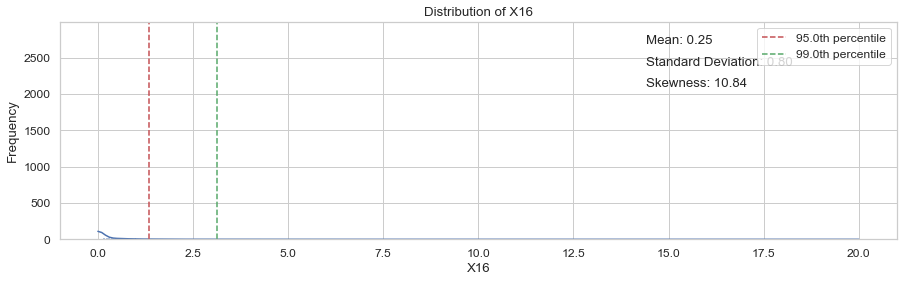

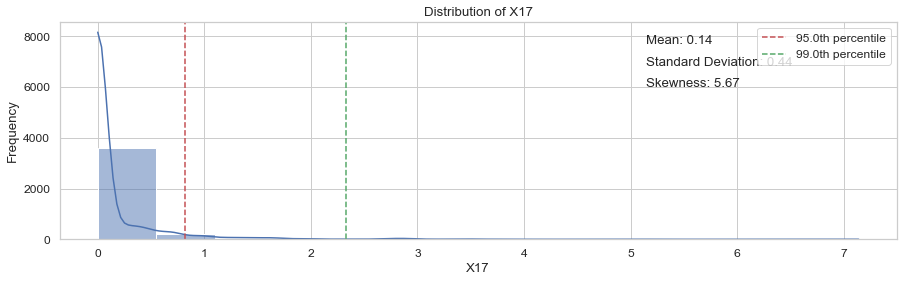

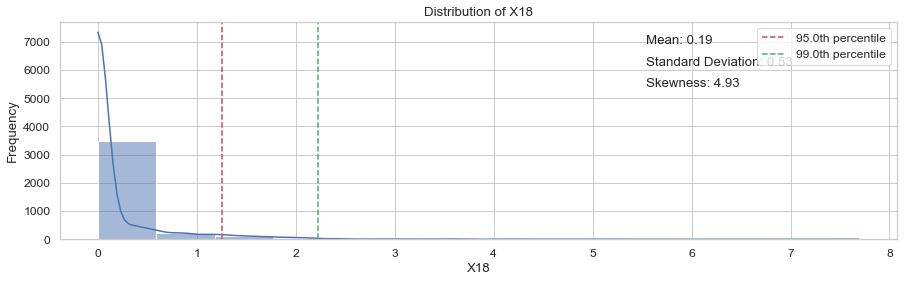

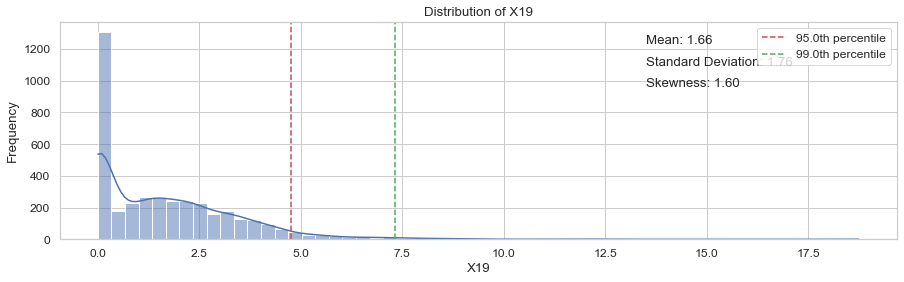

In [29]:
columns_to_plot = ["X11", "X12", "X13", "X14", "X15", "X16", "X17", "X18", "X19"]
plot_dtl_hist(train_data, columns_to_plot, 0.95, 0.99)

* *we can see that above distribution plots show that the distribution of most variables is positively skewed, with long tails extending beyond the second standard deviation on the positive side (represented by the red dashed line). This suggests that outliers are predominantly detected on the left side of the distribution.* 

* *We need to cheack outlier to each columns seperately using Box plot.*

In [30]:
train_data.shape

(3910, 58)

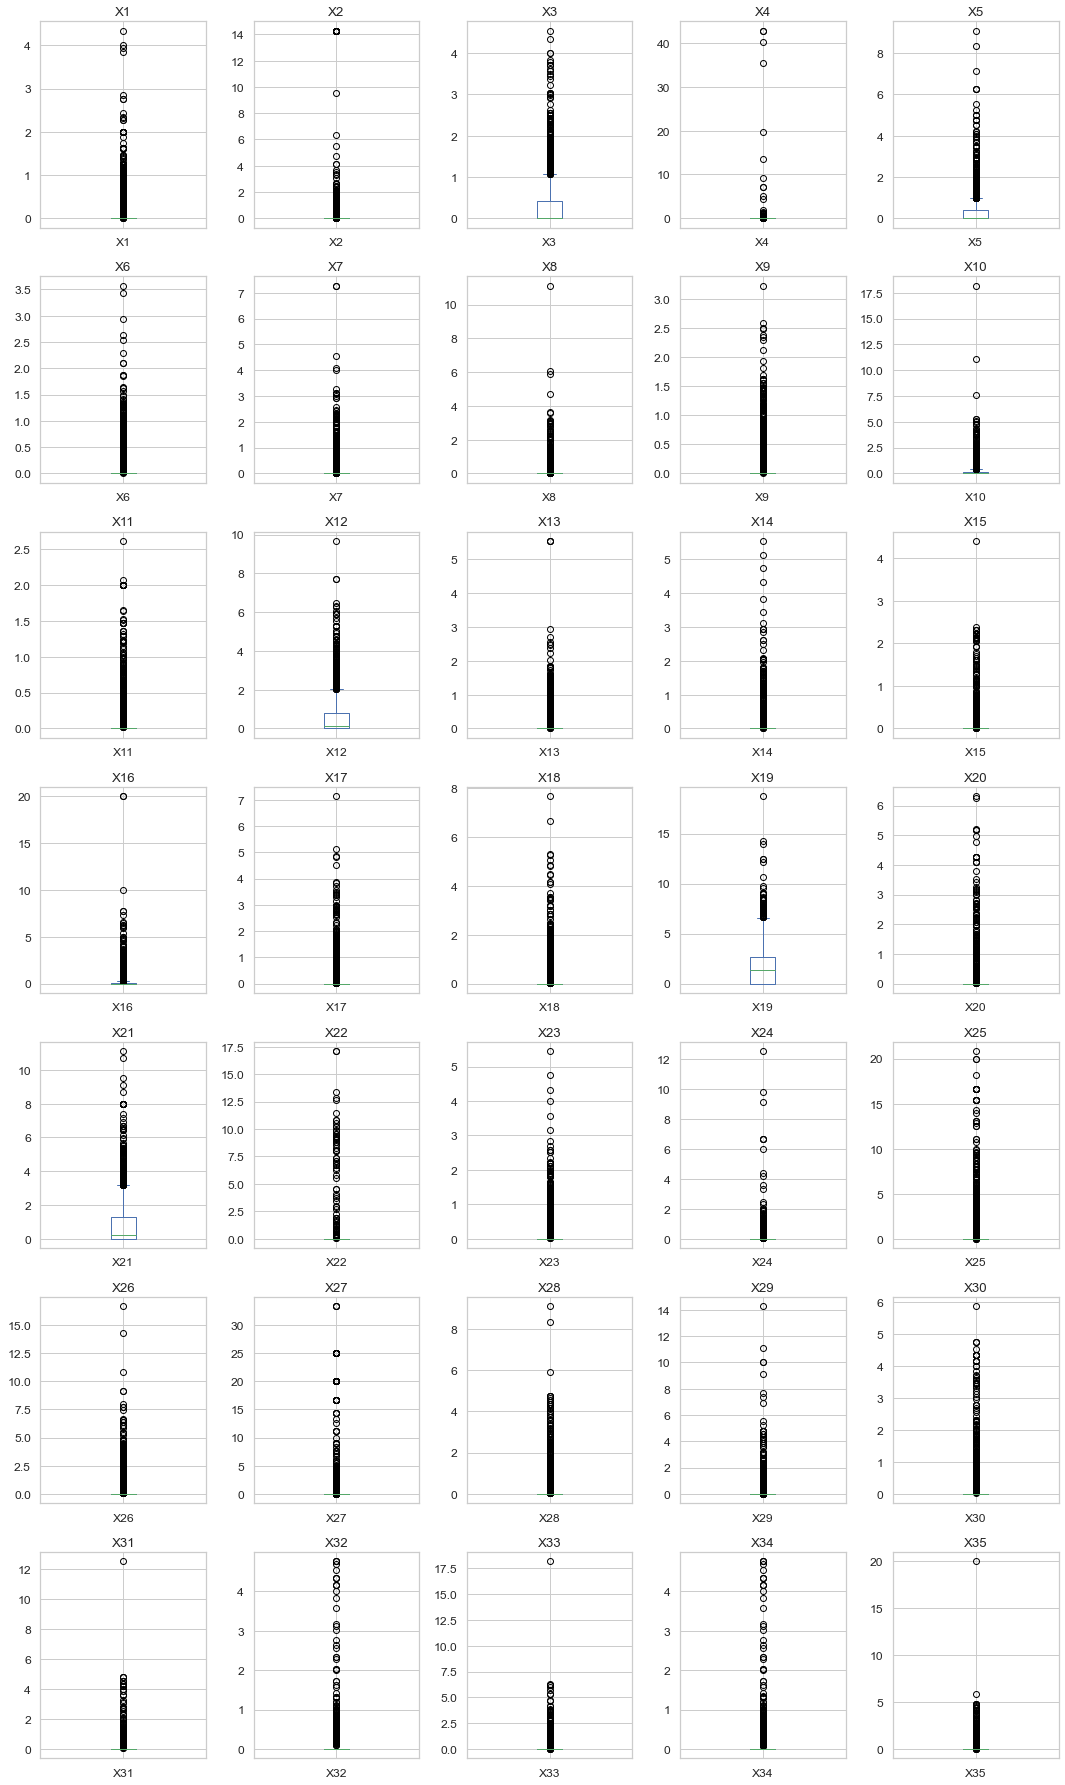

In [31]:
# 
fig, axes = plt.subplots(7, 5, figsize=(15, 25))
axes = axes.flatten()

# Iterate through the columns and create box plots
for i, col in enumerate(train_data.columns):
    if i < len(axes):  # Check if the index is within bounds
        train_data[col].plot.box(ax=axes[i])
        axes[i].set_title(col)

# Hide any remaining empty subplots
for i in range(len(train_data.columns), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()



* *we can see that above box plot ,each variable contains some data points outside the whiskers, indicating the presence of outliers in the dataset and The existence of outliers can significantly impact statistical analyses.*

***Multi-variate Analysis***

### Analyzing Relationships Between Numerical Variables ###

* Correlation Analysis :   
Our dataset have more than 50 variables for analysis so its difficult to each variablefor Analysis So I am using Corelation Anlysis for determine which variables to investigate further Analysis also helpul for to find relationship between two variable .

Text(0.5, 1.0, 'Correlation Heatmap for All Variables')

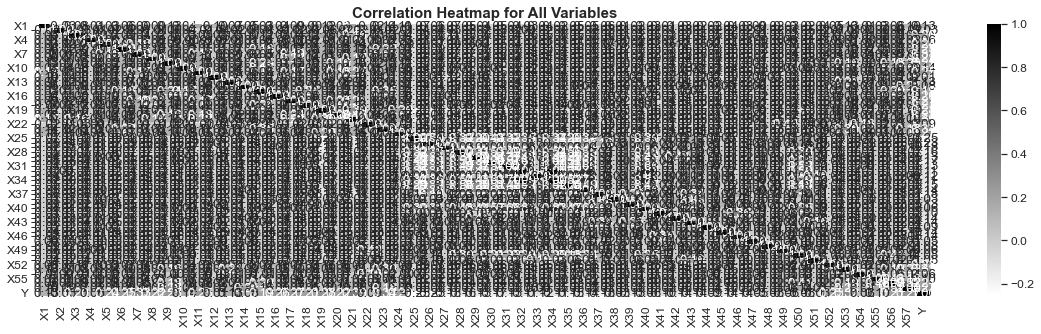

In [32]:
plt.figure(figsize=(20,5))

correlation_matrix = train_data.corr() 
sns.heatmap(correlation_matrix, annot=True, cmap="gray_r", fmt=".2f")

plt.title('Correlation Heatmap for All Variables',fontweight='bold',fontsize=15)


* *Due to the large number of variables, it's difficult to visualize, so we are filtering out only variables with a correlation greater than 0.5. This indicates highly correlated variables.*

Text(0.5, 1.0, 'Correlation Heatmap (Variables with Correlation > 0.5)')

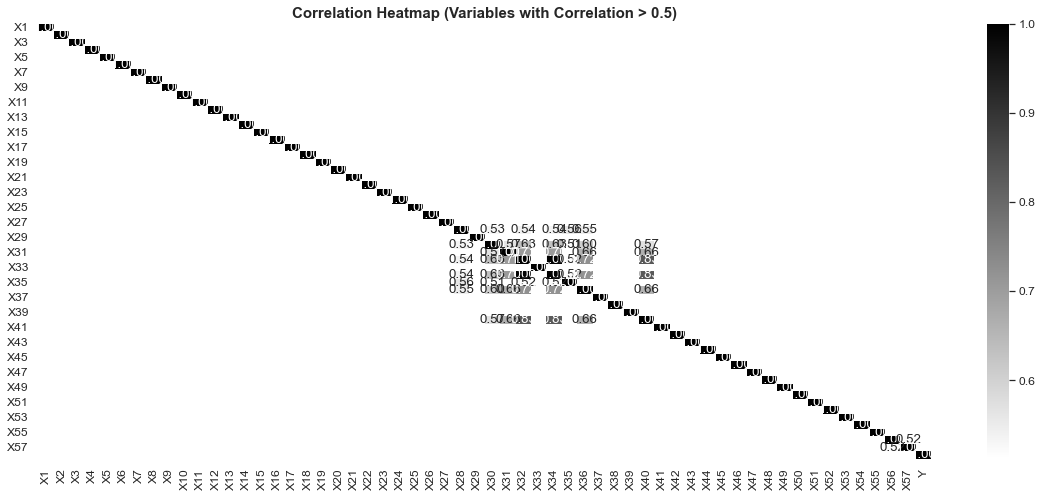

In [33]:
# Filter correlations greater than 0.5 (adjust the threshold as needed)
high_correlation = correlation_matrix[correlation_matrix > 0.5]


plt.figure(figsize=(20, 8))
sns.heatmap(high_correlation, annot=True, cmap='gray_r', fmt=".2f")
plt.title('Correlation Heatmap (Variables with Correlation > 0.5)',fontweight='bold',fontsize=15)


* *We can observe that the variables on the x-axis (X28-X40) and the variables on the y-axis (X25-X35) have a correlation greater than 0.5*


In [34]:
df_num_corr = train_data.corr()['Y'][:-1] # -1 because the latest row is Target variable
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Target Variable:\n{}".format(len(golden_features_list), golden_features_list))

There is 0 strongly correlated values with Target Variable:
Series([], Name: Y, dtype: float64)


Now using pair plots to visualize the relationships between pairs of variables and the target variable. 

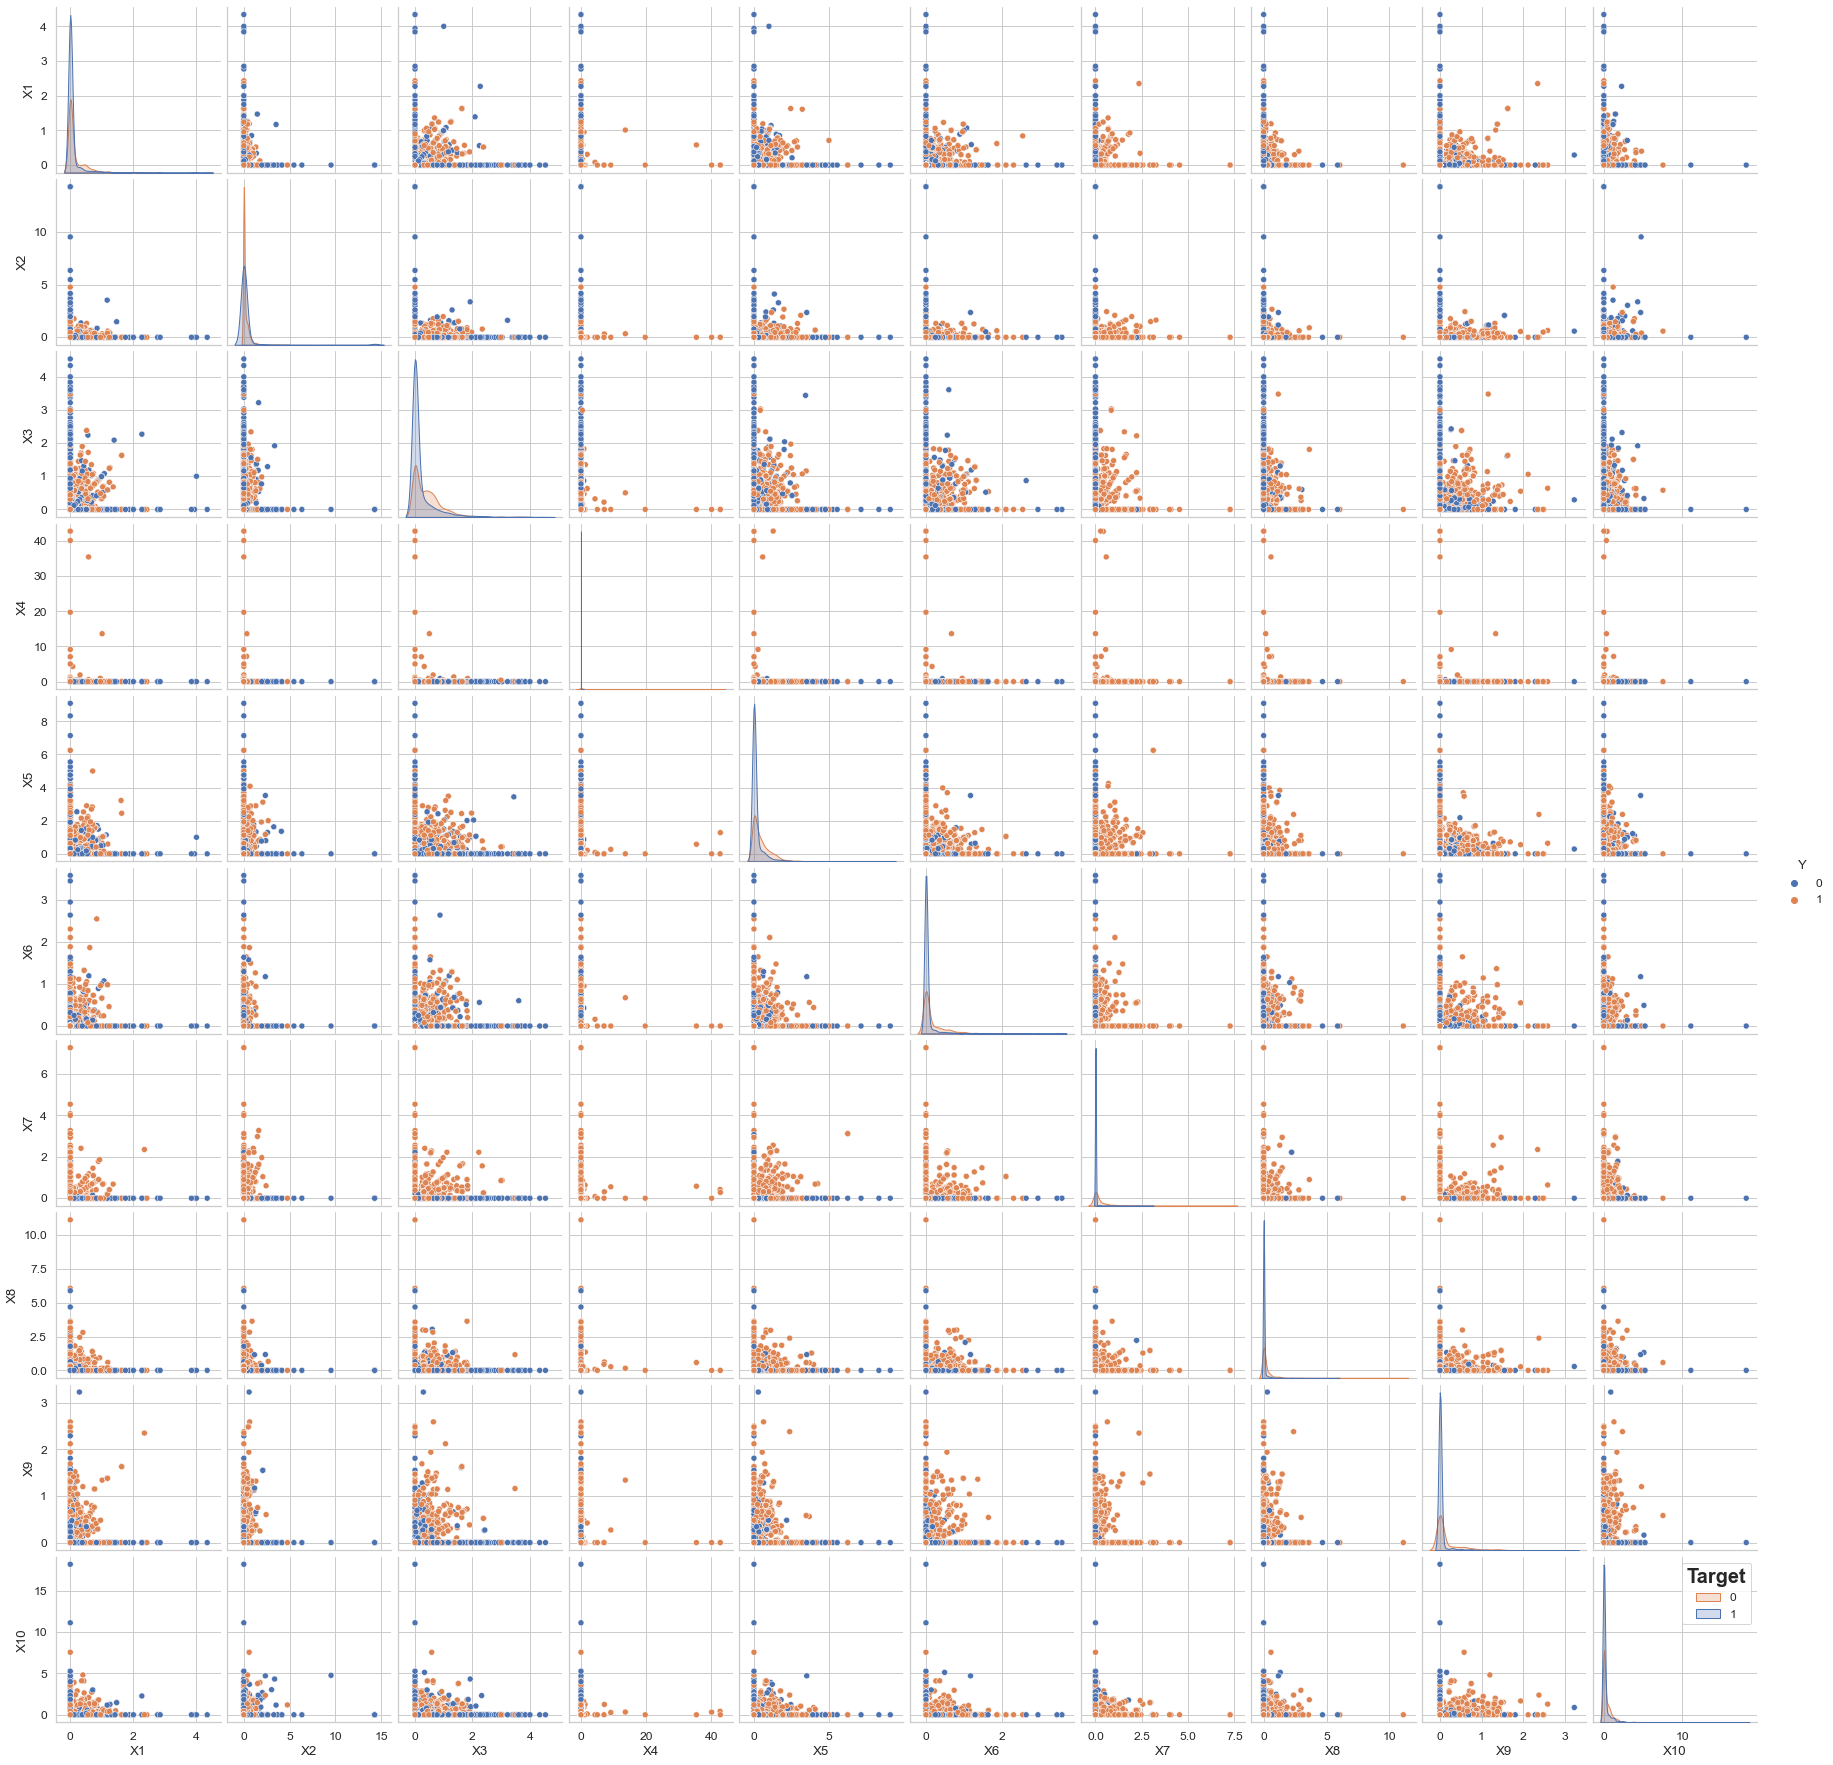

In [35]:
df_pair = pd.concat([train_data.iloc[:, :10], train_data['Y']], axis=1)  # Selecting a 10 variable for anlysis
sns.pairplot(df_pair, hue='Y', diag_kind='kde')

legend = plt.legend(title='Target', labels=['0', '1'])   # set target variable class lebel
legend.get_title().set_fontweight('bold')
legend.get_title().set_fontsize(20)

# 02.Data Preprocessing

we had not done any data cleaning or transformation by the time we finished the EDA section.So we have only determined what type of cleaning is required, what needs to be cleaned, and so on. 

* Handling Skewed Data
* Dealing with Outlier
* Basic Cleaning
* Handling Imbalanced Data
* feature Scaling

***Log transformation for Variable***
* transform skewed distribution to a normal distribution
* If your variable contains zero and negative values, the logarithmic transformation directly is not applicable.
* One such option is the Box-Cox transformation whichincludes the logarithmic transformation as a special case

In [36]:
train_data.shape

(3910, 58)

In [37]:
train_data.head(3)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.0,0.00,4.34,0.0,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.000,0.0,1.342,0.0,0.000,1.200,2,12,0
1,0.0,0.56,0.56,0.0,1.12,0.56,2.25,0.0,0.0,0.56,...,0.0,0.083,0.0,0.503,0.0,0.083,16.304,148,375,1
2,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.000,0.0,0.000,0.0,0.000,1.000,1,5,0


In [38]:
# filter the numeric values in the data
numerical_cols = train_data.select_dtypes(include=[np.number]).columns  
numerical_cols = [col for col in numerical_cols if col != 'Y']

In [39]:
transformed_data = train_data.copy()

In [40]:
for col in numerical_cols:
    # Shifting the variable by a constant to make it positive
    data_shifted = train_data[col] - train_data[col].min() + 1
    
    # Box-Cox transformation
    transformed_col, _ = boxcox(data_shifted)
    
    # Updating the Data with transformed values
    transformed_data[col] = transformed_col

In [41]:
transformed_data.head(3)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.0,0.000000,0.293011,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.249022,0.0,0.000000,0.173117,0.681677,2.535625,0
1,0.0,0.106993,0.229216,0.0,0.258511,0.084217,0.084276,0.0,0.0,0.170189,...,0.0,0.064925,0.0,0.205129,0.0,0.029402,1.392243,4.440068,6.220942,1
2,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1.630613,0


In [42]:
transformed_data.shape

(3910, 58)

In [43]:
train_data.head(3)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.0,0.00,4.34,0.0,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.000,0.0,1.342,0.0,0.000,1.200,2,12,0
1,0.0,0.56,0.56,0.0,1.12,0.56,2.25,0.0,0.0,0.56,...,0.0,0.083,0.0,0.503,0.0,0.083,16.304,148,375,1
2,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.000,0.0,0.000,0.0,0.000,1.000,1,5,0


<AxesSubplot:xlabel='X1', ylabel='Count'>

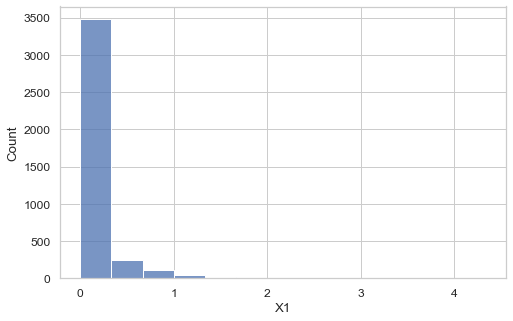

In [44]:
sns.histplot(train_data["X1"])

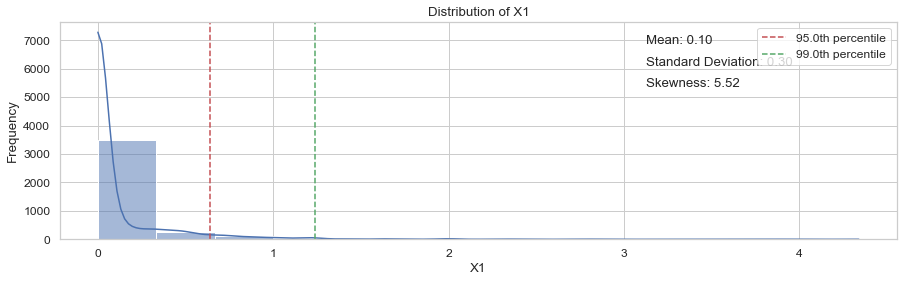

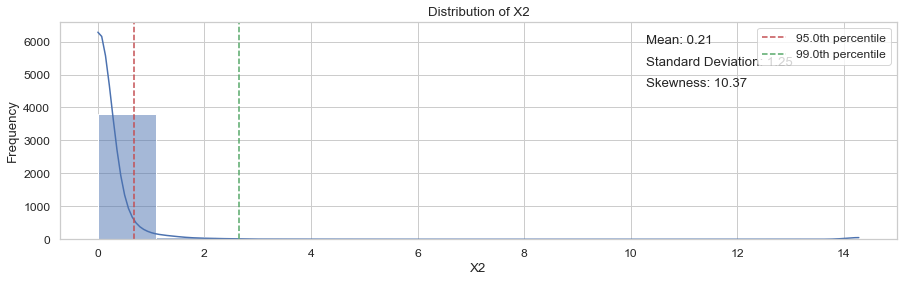

In [45]:
columns_to_plot = ['X1','X2']
plot_dtl_hist(train_data, columns_to_plot, 0.95, 0.99)

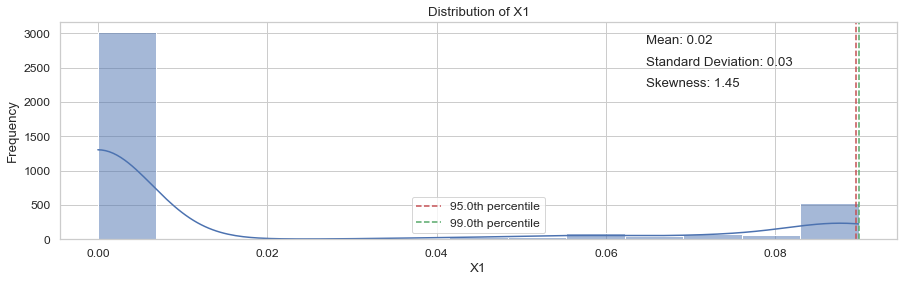

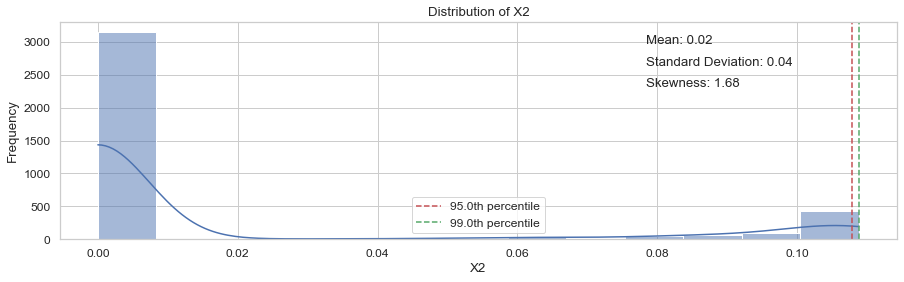

In [46]:
columns_to_plot = ['X1','X2']
plot_dtl_hist(transformed_data, columns_to_plot, 0.95, 0.99)

In [47]:
print("Before Box-Cox Transformation: ")

print(train_data["X1"].mean())
print(train_data['X1'].std())
print(train_data['X1'].skew())

Before Box-Cox Transformation: 
0.10298976982097188
0.29632219470994114
5.522075898527044


In [48]:
print("After Box-Cox Transformation: ")
print(transformed_data["X1"].mean())
print(transformed_data['X1'].std())
print(transformed_data['X1'].skew())

After Box-Cox Transformation: 
0.01764114968175196
0.03336636689720005
1.4463078340487436


* *As seen in the above plot, after applying the Box Cox transformation, our goal was to normalize the data into a normal distribution and reduce its skewness. However, the plot does not exactly show a normal distribution in the histogram. This might be due to the original data containing float values in the range of 0.00 to 0.1, with a majority of the data clustered around zero.*

C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X56'>

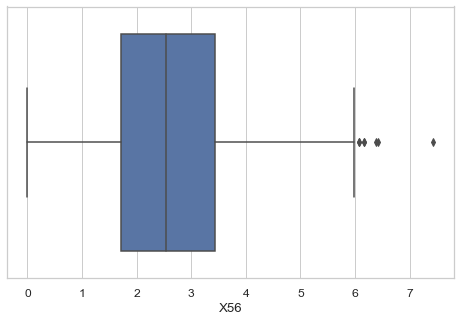

In [49]:
sns.boxplot(transformed_data['X56'])

C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X57'>

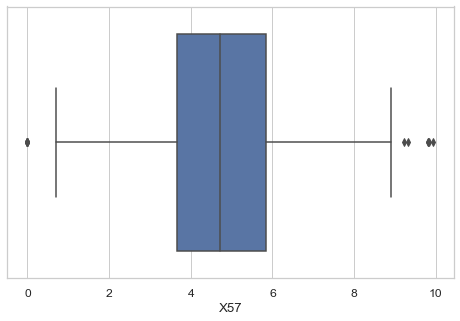

In [50]:
sns.boxplot(transformed_data['X57'])

In [51]:
transformed_data.shape

(3910, 58)

***Remove Outliers***
* Using IQR:The IQR method involves calculating the Interquartile Range and then defining a range for identifying outliers.

In [52]:
Q1 = transformed_data.quantile(0.25)
Q3 = transformed_data.quantile(0.75)
IQR = Q3 - Q1 

lower_limit = (Q1 - 1.5 * IQR)
upper_limit = (Q3 + 1.5 * IQR)

transformed_data_1 = transformed_data[~((transformed_data < lower_limit) | (transformed_data > upper_limit)).any(axis=1)]

C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X56'>

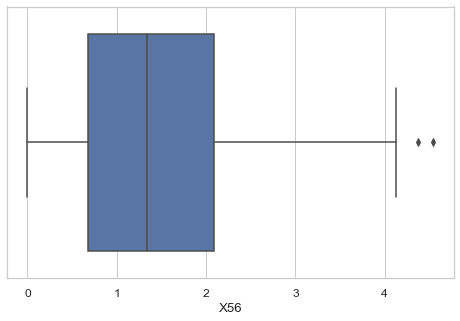

In [53]:
sns.boxplot(transformed_data_1['X56'])

C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X57'>

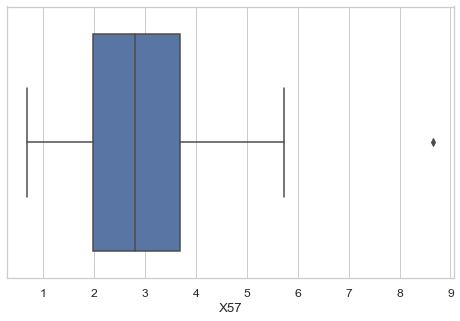

In [54]:
sns.boxplot(transformed_data_1['X57'])

C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X56'>

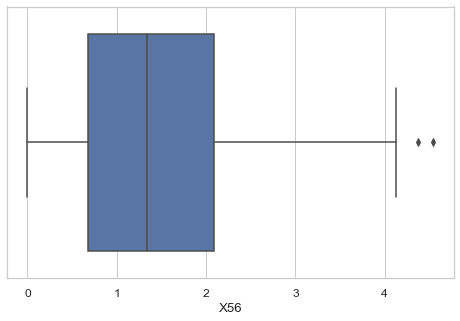

In [55]:
sns.boxplot(transformed_data_1['X56'])

C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X56'>

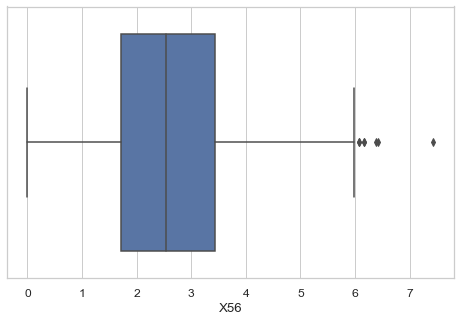

In [56]:
sns.boxplot(transformed_data['X56'])

C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will

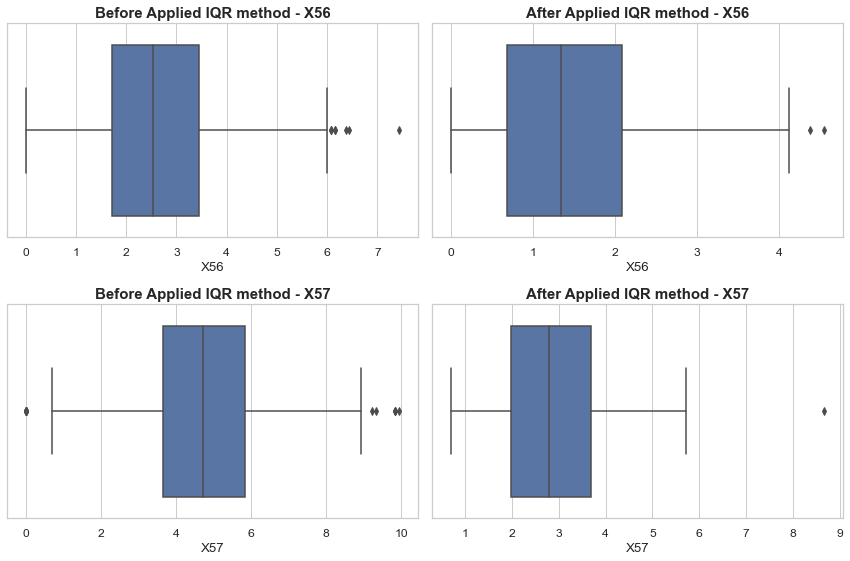

In [57]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))


sns.boxplot(transformed_data['X56'], ax=axes[0, 0])
axes[0, 0].set_title('Before Applied IQR method - X56',fontweight='bold', fontsize=15)


sns.boxplot(transformed_data_1['X56'], ax=axes[0, 1])
axes[0, 1].set_title('After Applied IQR method - X56',fontweight='bold', fontsize=15)


sns.boxplot(transformed_data['X57'], ax=axes[1, 0])
axes[1, 0].set_title('Before Applied IQR method - X57',fontweight='bold', fontsize=15)


sns.boxplot(transformed_data_1['X57'], ax=axes[1, 1])
axes[1, 1].set_title('After Applied IQR method - X57',fontweight='bold', fontsize=15)

plt.tight_layout()



* *comparison plot above illustrates that, through the application of the IQR method, outliers were successfully removed from the variable.*

In [58]:
transformed_data_1.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.0,0.0,0.293011,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.249022,0.0,0.0,0.173117,0.681677,2.535625,0
2,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,1.630613,0
25,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,1.401986,0
33,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.196166,0.0,0.0,0.777655,1.857297,3.423829,0
36,0.0,0.0,0.000000,0.0,0.276428,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.893733,2.084694,3.120889,0


***Remove duplicate records***

In [59]:
transformed_data_1.shape

(382, 58)

In [60]:
transformed_data_1.duplicated().sum()

59

In [61]:
transformed_data_1 = transformed_data_1.drop_duplicates()

In [62]:
transformed_data_1.duplicated().sum()

0

* *No duplicate records*

***Handling with Imbalanced data***
* at time of EDA we observe that our target variable is imbalanced where the target class has an uneven distribution of observations so its impact of Model Performance
* **SMOTE :** technique to oversample the minority class.

In [63]:
train_data['Y'].value_counts()

0    2376
1    1534
Name: Y, dtype: int64

In [64]:
train_data.shape

(3910, 58)

In [65]:
sm = SMOTE(sampling_strategy='minority', random_state=42)

# split input and target variable into X and y
X = train_data.drop('Y', axis=1)
y = train_data['Y']

X_resampled, y_resampled = sm.fit_resample(X, y)

transformed_data_1 = pd.concat([pd.DataFrame(y_resampled, columns=['Y']), pd.DataFrame(X_resampled)], axis=1)


In [66]:
transformed_data_1.shape

(4752, 58)

In [67]:
transformed_data_1['Y'].value_counts()

0    2376
1    2376
Name: Y, dtype: int64

In [68]:
train_data['Y'].value_counts()

0    2376
1    1534
Name: Y, dtype: int64

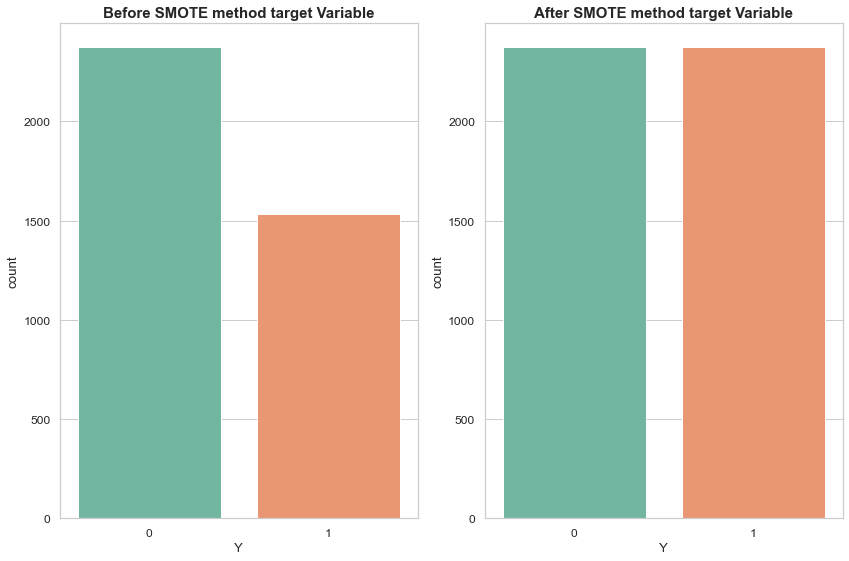

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))


sns.countplot(x='Y', data=train_data ,palette='Set2',ax=axes[0])
axes[0].set_title('Before SMOTE method target Variable',fontweight='bold', fontsize=15)


sns.countplot(x='Y', data=transformed_data_1 ,palette='Set2',ax=axes[1])
axes[1].set_title('After SMOTE method target Variable',fontweight='bold', fontsize=15)

plt.tight_layout()

* *Now the target variable class has been balanced.*

***Feature Scaling***
* Feature Scaling is used to transform the values of features or variables in a dataset to a similar scale toavoid biases in models that are sensitive to the scale of features.
* **Min-Max scaling:** values are shifted and rescaled so that they end up ranging between 0 and 1 also its useful forwhen the distribution of the data is unknown or not Gaussian

In [70]:
transformed_data_1.head(3)

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0,0.0,0.00,4.34,0.0,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.000,0.0,1.342,0.0,0.000,1.200,2,12
1,1,0.0,0.56,0.56,0.0,1.12,0.56,2.25,0.0,0.0,...,0.0,0.0,0.083,0.0,0.503,0.0,0.083,16.304,148,375
2,0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.000,0.0,0.000,0.0,0.000,1.000,1,5


In [71]:
print("Min value of without scaled variable:", transformed_data_1['X2'].min())
print("Max value of without scaled variable:", transformed_data_1['X2'].max())

Min value of without scaled variable: 0.0
Max value of without scaled variable: 14.28


In [72]:
scaler = MinMaxScaler()

# filter all input Variable and target variable
X = transformed_data_1.drop('Y', axis=1)
y = transformed_data_1['Y']

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit input var and transform the features
X_scaled = scaler_X.fit_transform(X)

# Fit target var and transform the features
y_reshaped = y.values.reshape(-1, 1)
y_scaled = scaler_y.fit_transform(y_reshaped)

scaled_data = pd.DataFrame(X_scaled, columns=X.columns)
scaled_data['Y'] = y_scaled.flatten()


transformed_data_scaled = pd.concat([scaled_data.drop('Y', axis=1), scaled_data['Y']], axis=1)


In [73]:
transformed_data_scaled.head(3)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.0,0.000000,0.955947,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.041320,0.0,0.000000,0.000182,0.000100,0.001093,0.0
1,0.0,0.039216,0.123348,0.0,0.123212,0.156863,0.309491,0.0,0.0,0.030803,...,0.0,0.008511,0.0,0.015487,0.0,0.004186,0.013894,0.014718,0.037173,1.0
2,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000398,0.0


<AxesSubplot:xlabel='X2', ylabel='Density'>

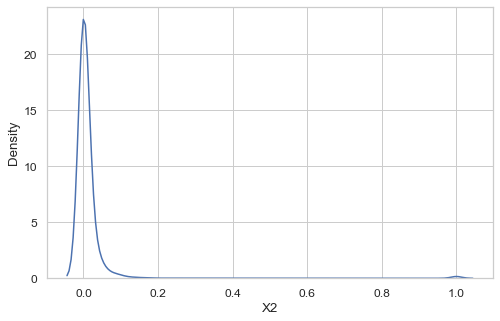

In [74]:
sns.kdeplot(transformed_data_scaled['X2'])

In [75]:
transformed_data_scaled['X2'].min()

0.0

In [76]:
transformed_data_scaled['X2'].max()

1.0

In [77]:
print("Min value of without scaled variable:", transformed_data_1['X1'].min())
print("Max value of without scaled variable:", transformed_data_1['X1'].max())
print("#########################################################################")
print("Min value of scaled variable:", transformed_data_scaled['X1'].min())
print("Max value of scaled variable:", transformed_data_scaled['X1'].max())


Min value of without scaled variable: 0.0
Max value of without scaled variable: 4.34
#########################################################################
Min value of scaled variable: 0.0
Max value of scaled variable: 1.0


In [78]:
print("Min value of without scaled variable:", transformed_data_1['X2'].min())
print("Max value of without scaled variable:", transformed_data_1['X2'].max())
print("#########################################################################")
print("Min value of scaled variable:", transformed_data_scaled['X2'].min())
print("Max value of scaled variable:", transformed_data_scaled['X2'].max())

Min value of without scaled variable: 0.0
Max value of without scaled variable: 14.28
#########################################################################
Min value of scaled variable: 0.0
Max value of scaled variable: 1.0


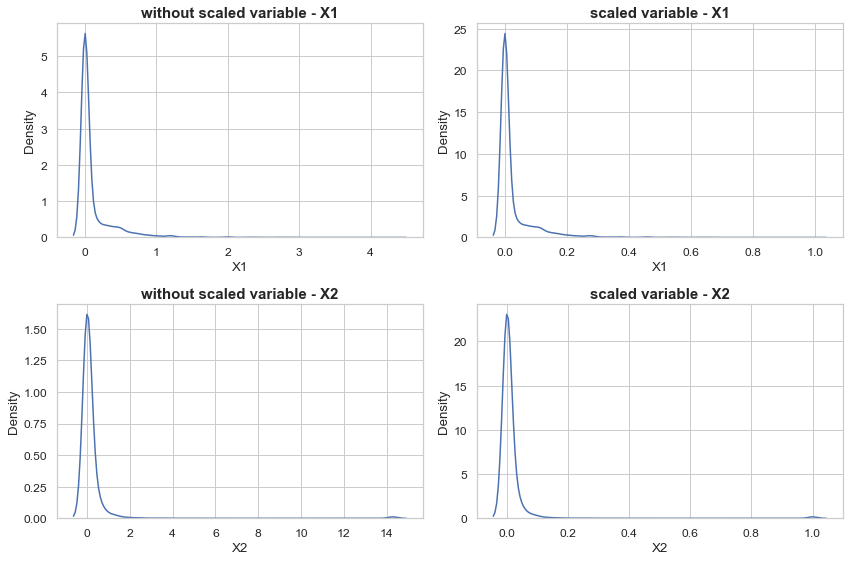

In [79]:

fig, axes = plt.subplots(2, 2, figsize=(12, 8))


sns.kdeplot(transformed_data_1['X1'], ax=axes[0, 0])
axes[0, 0].set_title('without scaled variable - X1',fontweight='bold', fontsize=15)


sns.kdeplot(transformed_data_scaled['X1'], ax=axes[0, 1])
axes[0, 1].set_title('scaled variable - X1',fontweight='bold', fontsize=15)


sns.kdeplot(transformed_data_1['X2'], ax=axes[1, 0])
axes[1, 0].set_title('without scaled variable - X2',fontweight='bold', fontsize=15)


sns.kdeplot(transformed_data_scaled['X2'], ax=axes[1, 1])
axes[1, 1].set_title('scaled variable - X2',fontweight='bold', fontsize=15)
plt.tight_layout()

# 03.feature Selection for Model Building
While developing the machine learning model, only a few variables in the dataset are useful for building the model, and the rest features are either redundant or irrelevant. 
* Remove high Corelated variable
* Stepwise Regression
* Mutual Information
* split train and test


**Remove highly Corelated variable:**if two features are highly correlated then the information they contain is very similar So it is better to remove one of them from the feature set

In [80]:
transformed_data_scaled.head(3)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.0,0.000000,0.955947,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.041320,0.0,0.000000,0.000182,0.000100,0.001093,0.0
1,0.0,0.039216,0.123348,0.0,0.123212,0.156863,0.309491,0.0,0.0,0.030803,...,0.0,0.008511,0.0,0.015487,0.0,0.004186,0.013894,0.014718,0.037173,1.0
2,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000398,0.0


In [81]:
df = transformed_data_scaled

In [82]:
df.head(3)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.0,0.000000,0.955947,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.041320,0.0,0.000000,0.000182,0.000100,0.001093,0.0
1,0.0,0.039216,0.123348,0.0,0.123212,0.156863,0.309491,0.0,0.0,0.030803,...,0.0,0.008511,0.0,0.015487,0.0,0.004186,0.013894,0.014718,0.037173,1.0
2,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000398,0.0


filter split input and taget variable

In [83]:
X = df.drop("Y",axis=1)
y = df['Y']

In [84]:
y.head(3)

0    0.0
1    1.0
2    0.0
Name: Y, dtype: float64

In [85]:
# make function for remove highly co-related variable

def correlation(dataset,threshold):
    col_corr = set()     # store all  correlated variable name 
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:    # poitive coeff value
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [86]:
corr_variable = correlation(X,0.5)

In [87]:
len(corr_variable)

9

In [88]:
corr_variable

{'X26', 'X30', 'X31', 'X32', 'X34', 'X35', 'X36', 'X40', 'X57'}

* *As we can see, the names of the highly correlated variables, which have a correlation greater than 0.5, were already observed during Exploratory Data Analysis (EDA).*
* So we found 9 variable which is highly correlated variable .

In [89]:
X = X.drop(corr_variable,axis =1)

In [90]:
len(X.columns)

48

In [91]:
57 - len(X.columns)

9

In [92]:
X.head(3)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56
0,0.0,0.000000,0.955947,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.041320,0.0,0.000000,0.000182,0.000100
1,0.0,0.039216,0.123348,0.0,0.123212,0.156863,0.309491,0.0,0.0,0.030803,...,0.0,0.0,0.0,0.008511,0.0,0.015487,0.0,0.004186,0.013894,0.014718
2,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000


In [93]:
y.head(3)

0    0.0
1    1.0
2    0.0
Name: Y, dtype: float64

In [94]:
X.shape

(4752, 48)

### train test split 4:1 ratio ###

* split the training data in training and validation set with ratio of 4:1 which 80:20 ratio

In [95]:
(4/5)*100

80.0

In [96]:
(1/5)*100

20.0

In [97]:
# train test split  

from sklearn.model_selection import train_test_split
X_train , X_test , y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [98]:
X.shape

(4752, 48)

In [99]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)   # validation set 
print("y_test shape:", y_test.shape)     # validation set

X_train shape: (3801, 48)
X_test shape: (951, 48)
y_train shape: (3801,)
y_test shape: (951,)


***stepwise Regression***

* Stepwise regression is a feature selection technique where the model is built iteratively by adding or removing features based on their statistical significance. 
* Regression function that performs forward and backward propagation based on p-values.if variable p-value less than level of significance which means that strong predication power of variable

In [100]:
import statsmodels.api as sm

# make function Stepwise Regression
def stepwise_regression(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
    included = list(initial_list)
    results = pd.DataFrame(columns=['Variable', 'P-value'])
    
    while True:
        changed = False
        # Forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded, dtype=float)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            results = results.append({'Variable': best_feature, 'P-value': best_pval}, ignore_index=True)
            changed = True
            if verbose:
                print(f'Add 1 feature: {best_feature}, p-value: {best_pval}')

        # Backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            results = results[results['Variable'] != worst_feature]
            if verbose:
                print(f'Drop 1 feature: {worst_feature}, p-value: {worst_pval}')

        if not changed:
            break

    return results





In [101]:
result_df = stepwise_regression(X_train, y_train, verbose=True)

C:\Users\Suraj\AppData\Local\Temp\ipykernel_18368\2055750074.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': best_feature, 'P-value': best_pval}, ignore_index=True)


Add 1 feature: X21, p-value: 4.9672925711229785e-160


C:\Users\Suraj\AppData\Local\Temp\ipykernel_18368\2055750074.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': best_feature, 'P-value': best_pval}, ignore_index=True)


Add 1 feature: X23, p-value: 8.042459566419712e-88


C:\Users\Suraj\AppData\Local\Temp\ipykernel_18368\2055750074.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': best_feature, 'P-value': best_pval}, ignore_index=True)


Add 1 feature: X7, p-value: 8.957542889164524e-71


C:\Users\Suraj\AppData\Local\Temp\ipykernel_18368\2055750074.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': best_feature, 'P-value': best_pval}, ignore_index=True)


Add 1 feature: X25, p-value: 1.1175144067139394e-42


C:\Users\Suraj\AppData\Local\Temp\ipykernel_18368\2055750074.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': best_feature, 'P-value': best_pval}, ignore_index=True)


Add 1 feature: X16, p-value: 2.841948196498051e-37


C:\Users\Suraj\AppData\Local\Temp\ipykernel_18368\2055750074.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': best_feature, 'P-value': best_pval}, ignore_index=True)


Add 1 feature: X56, p-value: 9.54033959372633e-36


C:\Users\Suraj\AppData\Local\Temp\ipykernel_18368\2055750074.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': best_feature, 'P-value': best_pval}, ignore_index=True)


Add 1 feature: X53, p-value: 1.0264383217228721e-29


C:\Users\Suraj\AppData\Local\Temp\ipykernel_18368\2055750074.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': best_feature, 'P-value': best_pval}, ignore_index=True)


Add 1 feature: X8, p-value: 5.757609068997764e-26


C:\Users\Suraj\AppData\Local\Temp\ipykernel_18368\2055750074.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': best_feature, 'P-value': best_pval}, ignore_index=True)


Add 1 feature: X19, p-value: 1.4714851989681163e-23


C:\Users\Suraj\AppData\Local\Temp\ipykernel_18368\2055750074.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': best_feature, 'P-value': best_pval}, ignore_index=True)


Add 1 feature: X27, p-value: 6.928691714353422e-18


C:\Users\Suraj\AppData\Local\Temp\ipykernel_18368\2055750074.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': best_feature, 'P-value': best_pval}, ignore_index=True)


Add 1 feature: X52, p-value: 9.625805581922523e-16


C:\Users\Suraj\AppData\Local\Temp\ipykernel_18368\2055750074.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': best_feature, 'P-value': best_pval}, ignore_index=True)


Add 1 feature: X45, p-value: 2.475914388693727e-17


C:\Users\Suraj\AppData\Local\Temp\ipykernel_18368\2055750074.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': best_feature, 'P-value': best_pval}, ignore_index=True)


Add 1 feature: X5, p-value: 1.1508254520623848e-15


C:\Users\Suraj\AppData\Local\Temp\ipykernel_18368\2055750074.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': best_feature, 'P-value': best_pval}, ignore_index=True)


Add 1 feature: X24, p-value: 4.7924667422198954e-14


C:\Users\Suraj\AppData\Local\Temp\ipykernel_18368\2055750074.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': best_feature, 'P-value': best_pval}, ignore_index=True)


Add 1 feature: X46, p-value: 2.6743212487711135e-12


C:\Users\Suraj\AppData\Local\Temp\ipykernel_18368\2055750074.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': best_feature, 'P-value': best_pval}, ignore_index=True)


Add 1 feature: X42, p-value: 1.976714819848618e-12


C:\Users\Suraj\AppData\Local\Temp\ipykernel_18368\2055750074.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': best_feature, 'P-value': best_pval}, ignore_index=True)


Add 1 feature: X9, p-value: 3.395690097275418e-11


C:\Users\Suraj\AppData\Local\Temp\ipykernel_18368\2055750074.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': best_feature, 'P-value': best_pval}, ignore_index=True)


Add 1 feature: X12, p-value: 3.260643302584114e-10


C:\Users\Suraj\AppData\Local\Temp\ipykernel_18368\2055750074.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': best_feature, 'P-value': best_pval}, ignore_index=True)


Add 1 feature: X18, p-value: 8.102092999983115e-10


C:\Users\Suraj\AppData\Local\Temp\ipykernel_18368\2055750074.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': best_feature, 'P-value': best_pval}, ignore_index=True)


Add 1 feature: X22, p-value: 6.93842012734319e-10


C:\Users\Suraj\AppData\Local\Temp\ipykernel_18368\2055750074.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': best_feature, 'P-value': best_pval}, ignore_index=True)


Add 1 feature: X6, p-value: 1.3153428422322226e-08


C:\Users\Suraj\AppData\Local\Temp\ipykernel_18368\2055750074.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': best_feature, 'P-value': best_pval}, ignore_index=True)


Add 1 feature: X33, p-value: 7.80594755152717e-08


C:\Users\Suraj\AppData\Local\Temp\ipykernel_18368\2055750074.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': best_feature, 'P-value': best_pval}, ignore_index=True)


Add 1 feature: X43, p-value: 1.1783587775927439e-07


C:\Users\Suraj\AppData\Local\Temp\ipykernel_18368\2055750074.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': best_feature, 'P-value': best_pval}, ignore_index=True)


Add 1 feature: X49, p-value: 4.5733792910038086e-07


C:\Users\Suraj\AppData\Local\Temp\ipykernel_18368\2055750074.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': best_feature, 'P-value': best_pval}, ignore_index=True)


Add 1 feature: X20, p-value: 1.227941457872811e-06


C:\Users\Suraj\AppData\Local\Temp\ipykernel_18368\2055750074.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': best_feature, 'P-value': best_pval}, ignore_index=True)


Add 1 feature: X44, p-value: 5.046025402826215e-06


C:\Users\Suraj\AppData\Local\Temp\ipykernel_18368\2055750074.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': best_feature, 'P-value': best_pval}, ignore_index=True)


Add 1 feature: X48, p-value: 0.00021840002206632112


C:\Users\Suraj\AppData\Local\Temp\ipykernel_18368\2055750074.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': best_feature, 'P-value': best_pval}, ignore_index=True)


Add 1 feature: X39, p-value: 0.00040003897245079667


C:\Users\Suraj\AppData\Local\Temp\ipykernel_18368\2055750074.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': best_feature, 'P-value': best_pval}, ignore_index=True)


Add 1 feature: X17, p-value: 0.00044868027183053244


C:\Users\Suraj\AppData\Local\Temp\ipykernel_18368\2055750074.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': best_feature, 'P-value': best_pval}, ignore_index=True)


Add 1 feature: X2, p-value: 0.0012457965246060528


C:\Users\Suraj\AppData\Local\Temp\ipykernel_18368\2055750074.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': best_feature, 'P-value': best_pval}, ignore_index=True)


Add 1 feature: X4, p-value: 0.0017898412206182217


C:\Users\Suraj\AppData\Local\Temp\ipykernel_18368\2055750074.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': best_feature, 'P-value': best_pval}, ignore_index=True)


Add 1 feature: X47, p-value: 0.0023532055442568997


In [102]:
print(result_df)

   Variable   P-value
0       X21       0.0
1       X23       0.0
2        X7       0.0
3       X25       0.0
4       X16       0.0
5       X56       0.0
6       X53       0.0
7        X8       0.0
8       X19       0.0
9       X27       0.0
10      X52       0.0
11      X45       0.0
12       X5       0.0
13      X24       0.0
14      X46       0.0
15      X42       0.0
16       X9       0.0
17      X12       0.0
18      X18       0.0
19      X22       0.0
20       X6       0.0
21      X33       0.0
22      X43       0.0
23      X49       0.0
24      X20  0.000001
25      X44  0.000005
26      X48  0.000218
27      X39    0.0004
28      X17  0.000449
29       X2  0.001246
30       X4   0.00179
31      X47  0.002353


In [103]:
after_corelation_var= list(X_train.columns)

In [104]:
p_value_less = list(result_df["Variable"]) 

In [105]:

not_in_p_value_less = [ele for ele in after_corelation_var if ele not in p_value_less]

print("Elements not present in p_value_less:", not_in_p_value_less)


Elements not present in p_value_less: ['X1', 'X3', 'X10', 'X11', 'X13', 'X14', 'X15', 'X28', 'X29', 'X37', 'X38', 'X41', 'X50', 'X51', 'X54', 'X55']


In [106]:
len(not_in_p_value_less)

16

* *After applying the stepwise regression method, 16 variables were dropped due to their p-values exceeding the predetermined level of significance. This indicates that these variables did not contribute significantly to the target variable.*

In [107]:
X_train.shape

(3801, 48)

In [108]:
X_test.shape

(951, 48)

In [109]:
## Drop variable those high p-value 
X_train = X_train.drop(not_in_p_value_less,axis =1)

X_test = X_test.drop(not_in_p_value_less,axis =1)

In [110]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (3801, 32)
X_test shape: (951, 32)


**Mutual Information**
* Mutual information(MI)between two random variables is a non-negative value,which measures the dependency between the variables .It is equal to zero if and only if two random variables are independent ,and higher values mean higher dependency


* mutual info = 0 : var provides no information about target variable
* mutual info > 0 or Close to 1 : perfectly or strong pridict the target variable

In [111]:
# determine the mutual information

mutual_info = mutual_info_classif(X_train , y_train)
mutual_info

array([0.07469844, 0.00369971, 0.11353692, 0.08777569, 0.17919701,
       0.07405917, 0.06155243, 0.07565635, 0.16281066, 0.09153398,
       0.07154432, 0.13472208, 0.08133247, 0.19214751, 0.01564008,
       0.10224598, 0.12345809, 0.11815595, 0.08705168, 0.01584718,
       0.0262686 , 0.01837891, 0.03554024, 0.02254786, 0.06988956,
       0.03658476, 0.00846006, 0.02034551, 0.01283615, 0.23558623,
       0.22118385, 0.18572246])

In [112]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info

X2     0.074698
X4     0.003700
X5     0.113537
X6     0.087776
X7     0.179197
X8     0.074059
X9     0.061552
X12    0.075656
X16    0.162811
X17    0.091534
X18    0.071544
X19    0.134722
X20    0.081332
X21    0.192148
X22    0.015640
X23    0.102246
X24    0.123458
X25    0.118156
X27    0.087052
X33    0.015847
X39    0.026269
X42    0.018379
X43    0.035540
X44    0.022548
X45    0.069890
X46    0.036585
X47    0.008460
X48    0.020346
X49    0.012836
X52    0.235586
X53    0.221184
X56    0.185722
dtype: float64

Text(0.5, 1.0, 'Mutual Information Scores for Features')

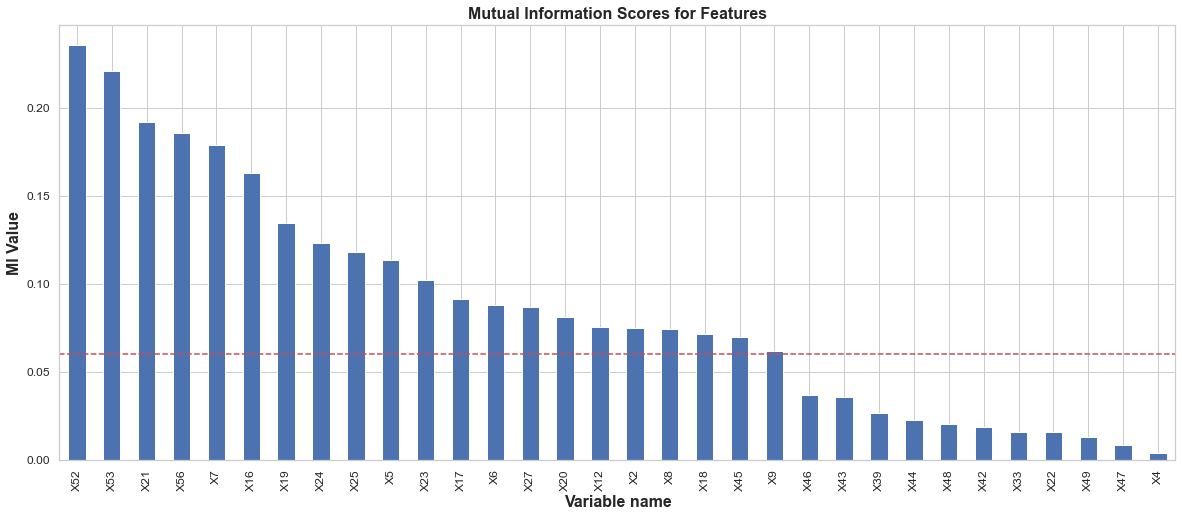

In [113]:
# let visualise using bar plot

mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8)) 

plt.axhline(y=0.06, color='r', linestyle='--', label='Threshold (0.06)')

plt.xlabel('Variable name', fontsize=16 ,fontweight='bold')
plt.ylabel('MI Value', fontsize=16 ,fontweight='bold')
plt.title('Mutual Information Scores for Features', fontsize=16 ,fontweight='bold')

**Criteria For selecting best variable for model building :**
When using Mutual Information for feature selection, we typically want to select features that have high +ve mutual information  value with the target variable
* So I am Set a threshold value i.e 0.06 as you can see in Plot red dashed line for mutual information, and select features that surpass this threshold.

In [114]:
not_select_vari = X_train.columns[mutual_info < 0.06]


In [115]:
not_select_vari

Index(['X4', 'X22', 'X33', 'X39', 'X42', 'X43', 'X44', 'X46', 'X47', 'X48',
       'X49'],
      dtype='object')

In [116]:
len(not_select_vari)

11

In [117]:
print("before Applied Mutual Information value")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

before Applied Mutual Information value
X_train shape: (3801, 32)
X_test shape: (951, 32)


In [118]:
## Drop variable those variable less than 0.06 MI value 
X_train = X_train.drop(not_select_vari,axis =1)

X_test = X_test.drop(not_select_vari,axis =1)

In [119]:

print("############# see changes #####################################")
print("After Applied Mutual Information value")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

############# see changes #####################################
After Applied Mutual Information value
X_train shape: (3801, 21)
X_test shape: (951, 21)


### Set of optialmal  Variable For pridication and Model Building ### 

In [120]:
X_train.head(3)

,X2,X5,X6,X7,X8,X9,X12,X16,X17,X18,...,X20,X21,X23,X24,X25,X27,X45,X52,X53,X56
1712,0.000000,0.143014,0.000000,0.000000,0.000000,0.000000,0.134436,0.065,0.182073,0.0,...,0.0,0.293429,0.000000,0.000000,0.0,0.0,0.030345,0.015857,0.017158,0.001101
4697,0.000000,0.008067,0.107532,0.086530,0.006601,0.022704,0.072638,0.000,0.064322,0.0,...,0.0,0.271894,0.172410,0.056193,0.0,0.0,0.000000,0.019787,0.029473,0.001201
638,0.067227,0.158416,0.000000,0.066025,0.000000,0.148607,0.099276,0.000,0.000000,0.0,...,0.0,0.086409,0.792661,0.038400,0.0,0.0,0.000000,0.013240,0.071631,0.030437


In [121]:
X_train.columns

Index(['X2', 'X5', 'X6', 'X7', 'X8', 'X9', 'X12', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X23', 'X24', 'X25', 'X27', 'X45', 'X52', 'X53', 'X56'],
      dtype='object')

* *Now that we have identified the set of optimal features to use for model building, we will utilize these variables to predict future outcomes.*

# 04. Model Implementation

I am training a logistic regression model. Logistic regression is a simple and widely used classification algorithm that models the relationship between the input variables and the probability of belonging to a specific class.

There are some assumption for applying logestic regression
- The dependent variable must be descreate target variable(Binary Outcome)
- the independent variables should not be correlated with each other
- requires quite large sample sizes

**And Using data pre-processing steps, our set optimal variables are satisfied by all these assumptions.** 

### 1.Implementing the Logistic Regression Model ###

In [122]:
#Fitting the Logistic Regression model

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif
import statsmodels.api as sm

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [123]:
# predictions on the validation set
y_pred = lr_model.predict(X_test)

#Predicted values
y_pred

array([0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0.,
       1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 0.

* we can make predictions using the predict() function. We pass the values of X_test to this method and compare the predicted values called y_pred with y_test values

In [124]:
##to check how accurate our predicted values are.

#Actual value and the predicted value
a = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred})
a.sample(10)

,Actual value,Predicted value
3063,0.0,0.0
2457,1.0,1.0
3740,0.0,0.0
2924,1.0,1.0
4252,1.0,0.0
4055,1.0,1.0
1082,0.0,0.0
4552,1.0,1.0
3401,1.0,1.0
1277,1.0,1.0


### *Evaluating the Model* ####

              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87       470
         1.0       0.89      0.85      0.87       481

    accuracy                           0.87       951
   macro avg       0.87      0.87      0.87       951
weighted avg       0.87      0.87      0.87       951



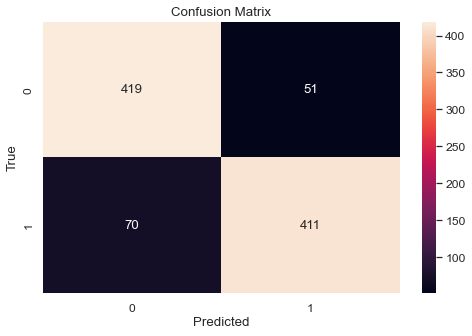

In [125]:
# Confusion matrix and classification report

matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_pred))

In [126]:
y_scores = lr_model.predict_proba(X_test)

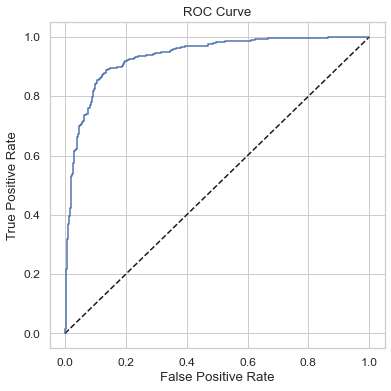

In [127]:
import matplotlib.pyplot as plt

# calculate ROC curve
fpr ,tpr ,treshholds = roc_curve(y_test ,y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize = (6,6))
#plot the diaginal 50%
plt.plot([0,1],[0,1],'k--')

# FPR & TPR captured by our model
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")

plt.show()

In [128]:
auc =roc_auc_score(y_test,y_scores[:,-1])
print('AUC Score: ' + str(auc) )

AUC Score: 0.934374308842394


As we can see that above plot and stat , its shows 
* **Accuracy:** the accuracy show that 0.87 ,which indicates that the accuracy of the model is 87%.
* **Precision:** the precision show that 0.85 ,which indicates that the precision of the model is 86%.
* **Recall:** the Recall show that 0.89 ,which indicates that the Recall of the model is 89%.
* **F1-score:** the f1-score show that 0.87 ,which indicates that the f1-score of the model is 87%.
* **AUC score:** model is performing well and its closest to 1 (93%) which is indicates that the model is performing well in distinguishing between the two classes (positive and negative).


### 2.Implementing the Neural Network Using Keras ###

* Now, I am building a simple neural network using Keras. Here I have used the Sequential model.
* The first layers of the model contain 16 neurons that take the input from the data and applies the sigmoid activation. The second layer contains a single neuron that takes the input from the preceding layer, applies a hard sigmoid activation and gives the classification output as 0 or 1.

In [129]:
# Declaring model
Neural_model = Sequential()

In [130]:
# # Adding layers to the model: 1 input layer, 2 hidden layers, and 1 output layer


# First hidden layer: 20 neurons/perceptrons.
Neural_model.add(Dense(units=20, activation='relu', input_shape=(21,)))

# Second hidden layer: 
Neural_model.add(Dense(units=10, activation='relu'))

# Third hidden layer: 
Neural_model.add(Dense(units=5, activation='relu'))

# Output layer: 1 neuron/perceptron 
Neural_model.add(Dense(1, activation='hard_sigmoid'))




In [131]:
# Compiling the model
sgd = optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)

Neural_model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])


* I have used ‘binary cross-entropy loss’ and SGD (Stochastic gradient descent) optimizer for compilation. The SGD has a learning rate of 0.5 and a momentum of 0.9.

In [132]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10)


In [133]:
# Training the model
Neural_model.fit(X_train, y_train, epochs=200, batch_size=100,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/200
31/31 [==============================] - 2s 18ms/step - loss: 0.6918 - accuracy: 0.5651 - val_loss: 0.6913 - val_accuracy: 0.5716
Epoch 2/200
31/31 [==============================] - 0s 6ms/step - loss: 0.6893 - accuracy: 0.6566 - val_loss: 0.6871 - val_accuracy: 0.7135
Epoch 3/200
31/31 [==============================] - 0s 5ms/step - loss: 0.6842 - accuracy: 0.7220 - val_loss: 0.6819 - val_accuracy: 0.7346
Epoch 4/200
31/31 [==============================] - 0s 6ms/step - loss: 0.6790 - accuracy: 0.7368 - val_loss: 0.6762 - val_accuracy: 0.7385
Epoch 5/200
31/31 [==============================] - 0s 5ms/step - loss: 0.6728 - accuracy: 0.7437 - val_loss: 0.6687 - val_accuracy: 0.7608
Epoch 6/200
31/31 [==============================] - 0s 5ms/step - loss: 0.6640 - accuracy: 0.7671 - val_loss: 0.6575 - val_accuracy: 0.7845
Epoch 7/200
31/31 [==============================] - 0s 5ms/step - loss: 0.6510 - accuracy: 0.7737 - val_loss: 0.6411 - val_accuracy: 0.8029
Epoch 8/200


In [134]:
# Test, Loss and accuracy
loss_and_metrics = Neural_model.evaluate(X_test, y_test)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

30/30 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.5457
Loss =  0.6852551102638245
Accuracy =  0.5457413196563721


* When the model is evaluated, we obtain a loss = 7.53 and accuracy = 50%

# 05.predictions on the test set Using Logestic Model

In [135]:
test_data.head(3)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0.70,0.0,0.70,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.105,0.000,0.000,2.342,47,89
1,0.00,0.0,0.84,0.0,0.84,0.00,0.84,0.00,0.00,0.00,...,0.0,0.0,0.388,0.0,0.776,0.129,0.000,10.375,168,249
2,0.46,0.3,0.46,0.0,0.05,0.12,0.05,0.28,0.43,0.74,...,0.0,0.0,0.065,0.0,0.325,0.756,0.153,5.891,193,3040


In [136]:
test_data.shape

(691, 57)

In [137]:
X_train.columns

Index(['X2', 'X5', 'X6', 'X7', 'X8', 'X9', 'X12', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X23', 'X24', 'X25', 'X27', 'X45', 'X52', 'X53', 'X56'],
      dtype='object')

In [138]:
# predictions on the test set
test_predictions = lr_model.predict(test_data[X_train.columns])

In [139]:
test_predictions.shape

(691,)

In [140]:
test_predictions

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1.

In [142]:
#pd.DataFrame({'Actual value': y_test, 'Predicted value':test_predictions}).sample(10)


In [143]:
# Create a DataFrame with test data  and predictions
result_df = pd.DataFrame(data=test_data[X_train.columns], columns=X_train.columns)
result_df['Predictions'] = test_predictions

In [144]:
result_df.shape

(691, 22)

In [145]:
result_df.head(3)

,X2,X5,X6,X7,X8,X9,X12,X16,X17,X18,...,X21,X23,X24,X25,X27,X45,X52,X53,X56,Predictions
0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.0,1.41,0.105,0.000,47,1.0
1,0.0,0.84,0.00,0.84,0.00,0.00,0.00,0.00,0.00,0.00,...,1.69,0.00,0.84,0.0,0.0,0.00,0.776,0.129,168,1.0
2,0.3,0.05,0.12,0.05,0.28,0.43,0.97,0.25,0.43,0.02,...,1.46,1.05,0.36,0.0,0.0,0.02,0.325,0.756,193,1.0


In [146]:
X_train.columns

Index(['X2', 'X5', 'X6', 'X7', 'X8', 'X9', 'X12', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X23', 'X24', 'X25', 'X27', 'X45', 'X52', 'X53', 'X56'],
      dtype='object')

In [147]:
result_df["Predictions"].value_counts()

1.0    628
0.0     63
Name: Predictions, dtype: int64

In [190]:
ss.shape

(691, 2)

In [191]:
# submission file with predictions
ss['Predictions'] = test_predictions

In [192]:
ss.head()

,Unnamed: 0,Y,Predictions
0,0,0,1.0
1,1,1,1.0
2,2,1,1.0
3,3,1,1.0
4,4,1,1.0


30/30 [==============================] - 0s 3ms/step - loss: 0.6853 - accuracy: 0.5457


Text(0.5, 1.0, 'Loss and Accuracy For Neural Network')

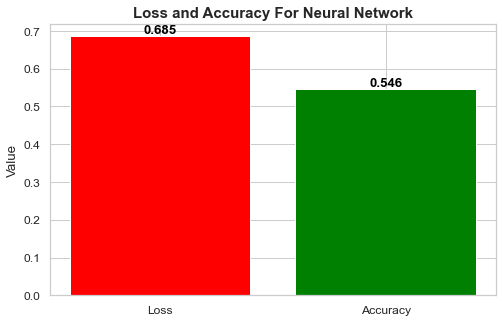

In [189]:
loss_and_metrics = Neural_model.evaluate(X_test, y_test)
loss = loss_and_metrics[0]
accuracy = loss_and_metrics[1]

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(['Loss', 'Accuracy'], [loss, accuracy], color=['red', 'green'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom', color='black', fontweight='bold')

plt.ylabel('Value')
plt.title('Loss and Accuracy For Neural Network' ,fontweight='bold', fontsize=15)


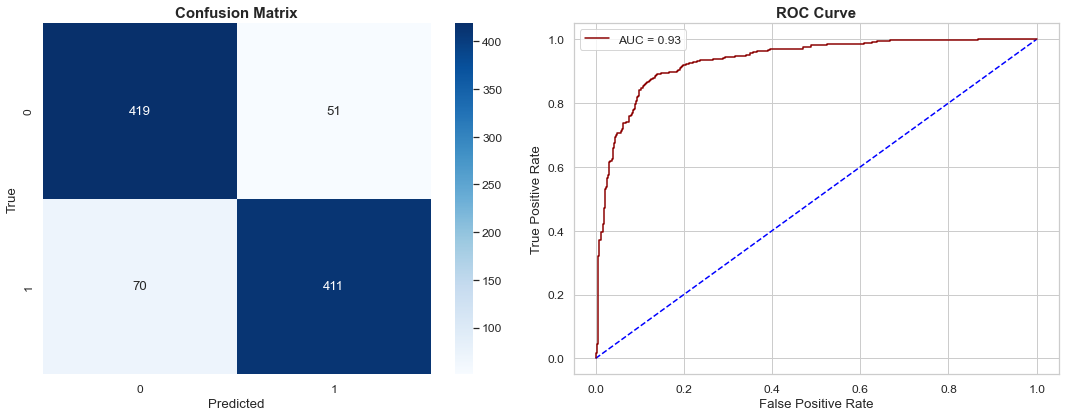

In [186]:

matrix = confusion_matrix(y_test, y_pred)
y_scores = lr_model.predict_proba(X_test)

#sns.set_palette(sns.dark_palette("dark blue"))
sns.set_palette(sns.dark_palette("darkred", reverse=True))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Subplot 1: Confusion Matrix
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title('Confusion Matrix', fontweight='bold', fontsize=15)
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

# Subplot 2: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])
roc_auc = roc_auc_score(y_test, y_scores[:, 1])

axes[1].plot([0, 1], [0, 1], linestyle='--', color='blue')  # Diagonal line
axes[1].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
axes[1].set_title('ROC Curve', fontweight='bold', fontsize=15)
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].legend()

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Distribution of Predictions fot Test Data')

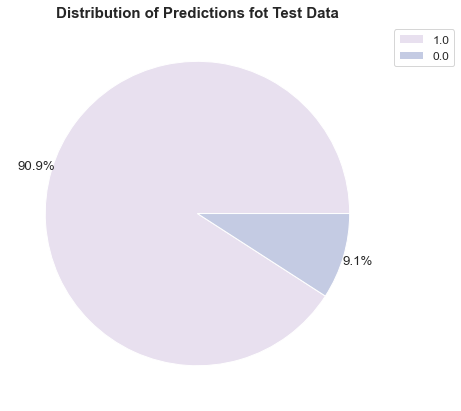

In [163]:
sns.set_palette('PuBuGn')

plt.figure(figsize=(10,7))
prediction_counts = result_df["Predictions"].value_counts()



pie_1 = prediction_counts
plt.pie(pie_1, autopct="%.1f%%", pctdistance=1.1)
plt.legend(labels = pie_1.index, 
          bbox_to_anchor=[1,1])
plt.title('Distribution of Predictions fot Test Data',fontweight='bold',fontsize=15)

# 0.6 Observation

**Summary of Dataset Analysis:**



- **Data Skewness:** The data is skewed, with around 90% of zero values present in each variable.

- **Variable Types:** All variables are numerical, including the target variable.

- **Variable Means:** the majority of variables have means ranging from 0.006054 to 6.048653. observe some variable, X56 and X57 stand out with extraordinarily high means.

- **Duplicates:** The dataset contains a total of 296 duplicate records.

- **Target Distribution:** Class '0' constitutes 60.8% of the dataset, whereas class '1' constitutes 39.2%.

- **Outliers:** Outliers are observed in each variable,very small amout of outlier presence.

- **Variable Correlation:** Certain variables, specifically X28-X40 and X25-X35, exhibit a correlation greater than 0.5.and No variables show a strong correlation with the target variable.

 


**Conclusion from Neural Network**
* As observed, the neural network did not perform well on our dataset, achieving only 54% accuracy. While it is possible to improve accuracy through hyperparameter tuning, the process is time-consuming. 
* In comparison, logistic regression showed better performance on our dataset. Therefore, we have decided to proceed with logistic regression.


**Conclusion from Logestic Regression**
* *There were 3910 records in the dataset, out of which 80% of the data was given for training the model and 20% of the data, i.e., 951 records, were given for testing the model. And out of 951 records, 12 records were misclassified.*

Note :  
*when we apply the Synthetic Minority Over-sampling Technique (SMOTE) to address class imbalance in a dataset, the original shape of the data can change. SMOTE creates synthetic examples of the minority class by interpolating between existing minority class instances. This process introduces new instances that weren't in the original dataset.*

* we can see that our model prediction results for the test dataset, which consisted of 691 records. Our model classified 90.9% of the samples as class 1 and 9.1% as class 0.

## writte all the Output ###

In [ ]:
# for all  variables calulates statstics 

# percentage the count of zeros
def count_zeros(series):
    return (series == 0).sum() / len(series) * 100

# percentage of missing values
def percentage_missing(series):
    return (series.isnull().sum() / len(series)) * 100

# List to store column-wise summary information
summary_info = []

for column in train_data.columns:
    col_data = train_data[column]

    # Calculate summary statistics
    summary = {
        'Variable_Name': column,
        'Variable_DType': col_data.dtype,
        'Count': len(col_data),
        'Mean': col_data.mean(),
        'Median': col_data.median(),
        #'Mode':col_data.mode(),
        'Min': col_data.min(),
        'Q1': np.percentile(col_data.dropna(), 25),
        'Q2': np.percentile(col_data.dropna(), 50),
        'Q3': np.percentile(col_data.dropna(), 75),
        'Max': col_data.max(),
        'Std_Deviation': col_data.std(),
        'skew':col_data.skew(),
        'Distinct_Values': col_data.nunique(),
        'Percentage_Of_Zeros': count_zeros(col_data),
        'Percentage_Of_Missing': percentage_missing(col_data),
        }

    summary_info.append(summary)

# DataFrame from the summary information
summary_df = pd.DataFrame(summary_info, columns=['Variable_Name','Variable_DType','Count','Mean','Median','Min',
                                                'Q1','Q2','Q3','Max','Std_Deviation','skew','Distinct_Values','Percentage_Of_Zeros',
                                                'Percentage_Of_Missing'])




In [ ]:
# Display the summary DataFrame
summary_df.head(3)

In [ ]:
# for all  variables calulates statstics

def generate_summary(train_data):
    
    #  the count of zeros
    def count_zeros(series):
        return (series == 0).sum() / len(series) * 100

    # percentage of missing values
    def percentage_missing(series):
        return (series.isnull().sum() / len(series)) * 100

    
    summary_info = []

    for column in train_data.columns:
        col_data = train_data[column]

        # summary statistics
        summary = {
            'Variable_Name': column,
            'Variable_DType': col_data.dtype,
            'Count': len(col_data),
            'Mean': col_data.mean(),
            'Median': col_data.median(),
            'Min': col_data.min(),
            'Q1': np.percentile(col_data.dropna(), 25),
            'Q2': np.percentile(col_data.dropna(), 50),
            'Q3': np.percentile(col_data.dropna(), 75),
            'Max': col_data.max(),
            'Std_Deviation': col_data.std(),
            'skew': col_data.skew(),
            'Distinct_Values': col_data.nunique(),
            'Percentage_Of_Zeros': count_zeros(col_data),
            'Percentage_Of_Missing': percentage_missing(col_data),
        }

        summary_info.append(summary)

    # make DataFrame from the summary information
    summary_df = pd.DataFrame(summary_info, columns=['Variable_Name', 'Variable_DType', 'Count', 'Mean', 'Median', 'Min',
                                                      'Q1', 'Q2', 'Q3', 'Max', 'Std_Deviation', 'skew',
                                                      'Distinct_Values', 'Percentage_Of_Zeros', 'Percentage_Of_Missing'])

    # save summary_df to an Excel file
    summary_df.to_excel('summary_output.xlsx', index=False)

    return summary_df



In [ ]:

result_df = generate_summary(train_data)
result_df.head()

In [ ]:
# for all  variables pair calulates Corelation Coefficiant

def correlation(dataset, target_variable):
    correlated_vars = []  # store all variable pairs and their correlation coefficients
    corr_matrix = dataset.drop(columns=[target_variable]).corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            corr_value = corr_matrix.iloc[i, j]
            col_name_i = corr_matrix.columns[i]
            col_name_j = corr_matrix.columns[j]
            variable_pair = f"{col_name_i} - {col_name_j}"
            correlated_vars.append({'Variable Pair': variable_pair, 'Correlation Coefficient': corr_value})

    return pd.DataFrame(correlated_vars)

In [ ]:
correlation_df = correlation(train_data, target_variable='Y')
print(correlation_df.sample(3))

In [ ]:
##os.chdir("C:\\Users\\Suraj\\Documents\\Analytics_Project_Repo\\ML Project\\Global Solution IT\\Codes_And_Results")

In [ ]:
##ss.to_csv('updated_submission.csv', index=False)

In [ ]:
##result_df.to_csv("test_data_with_predication.csv",index=False)
##result_df.to_excel("Variables_Stat_Summary.xlsx",sheet_name="Statstics_Summary",index=False)
##correlation_df.to_excel("Variable_Correlation Coefficiant.xlsx",sheet_name="Variable_Correlation Coefficiant",index=False)